In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams["figure.figsize"] = (16,8)
import plotly.graph_objects as go
from numba import jit
import typing
import os
import time

In [2]:
os.getcwd()

'D:\\JetBrains\\Programms\\Notebooks\\DSprojects\\CMF\\HFT project (2022)'

In [3]:
os.chdir('D:\\JetBrains\\Programms\\Notebooks\\DSprojects\\CMF\\HFT project (2022)')

In [4]:
os.getcwd()

'D:\\JetBrains\\Programms\\Notebooks\\DSprojects\\CMF\\HFT project (2022)'

I pre-cleaned the data on trades by removing outliers from the data.

In [5]:
BTC_trades_clear = pd.read_csv('BTC_trades.csv')

In [6]:
BTC_trades_clear.head()

receive_ts                    exchange_ts aggro_side  \
0  2022-06-23 00:00:02.624789714  2022-06-23 00:00:02.623000000        BID   
1  2022-06-23 00:00:05.293556247  2022-06-23 00:00:05.292000000        BID   
2  2022-06-23 00:00:05.293628020  2022-06-23 00:00:05.292000000        BID   
3  2022-06-23 00:00:05.293832021  2022-06-23 00:00:05.292000000        BID   
4  2022-06-23 00:00:05.293929517  2022-06-23 00:00:05.292000000        BID   

     price   size  
0  19977.5  0.001  
1  19977.5  0.041  
2  19977.5  0.036  
3  19977.5  0.001  
4  19977.5  0.001

Let's read order book data.

In [7]:
BTC_lobs = pd.read_csv('./md/btcusdt_Binance_LinearPerpetual/lobs.csv', skipinitialspace=True)

In [8]:
BTC_lobs.head()

receive_ts          exchange_ts  \
0  1655942402250125991  1655942402249000000   
1  1655942402657844605  1655942402655000000   
2  1655942403346968722  1655942403346000000   
3  1655942404080791047  1655942404080000000   
4  1655942404452706766  1655942404452000000   

   btcusdt:Binance:LinearPerpetual_ask_price_0  \
0                                      19977.5   
1                                      19977.5   
2                                      19977.5   
3                                      19977.5   
4                                      19977.5   

   btcusdt:Binance:LinearPerpetual_ask_vol_0  \
0                                      0.079   
1                                      0.078   
2                                      0.079   
3                                      0.079   
4                                      0.079   

   btcusdt:Binance:LinearPerpetual_bid_price_0  \
0                                      19977.4   
1                                      19977.4   
2                                      19977.4   
3                                      19977.4   
4                                      19977.4   

   btcusdt:Binance:LinearPerpetual_bid_vol_0  \
0                                     12.381   
1                                     12.381   
2                                     12.381   
3                                     12.381   
4                                     12.381   

   btcusdt:Binance:LinearPerpetual_ask_price_1  \
0                                      19977.8   
1                                      19977.8   
2                                      19977.8   
3                                      19977.8   
4                                      19977.8   

   btcusdt:Binance:LinearPerpetual_ask_vol_1  \
0                                      0.003   
1                                      0.003   
2                                      0.003   
3                                      0.003   
4                                      0.003   

   btcusdt:Binance:LinearPerpetual_bid_price_1  \
0                                      19976.7   
1                                      19977.3   
2                                      19977.3   
3                                      19977.3   
4                                      19977.3   

   btcusdt:Binance:LinearPerpetual_bid_vol_1  ...  \
0                                      0.066  ...   
1                                      0.126  ...   
2                                      0.126  ...   
3                                      0.126  ...   
4                                      0.126  ...   

   btcusdt:Binance:LinearPerpetual_bid_price_7  \
0                                      19975.7   
1                                      19975.9   
2                                      19975.9   
3                                      19975.9   
4                                      19975.9   

   btcusdt:Binance:LinearPerpetual_bid_vol_7  \
0                                      4.455   
1                                      0.246   
2                                      0.246   
3                                      0.246   
4                                      0.246   

   btcusdt:Binance:LinearPerpetual_ask_price_8  \
0                                      19980.1   
1                                      19980.1   
2                                      19980.1   
3                                      19980.1   
4                                      19980.1   

   btcusdt:Binance:LinearPerpetual_ask_vol_8  \
0                                       0.01   
1                                       0.01   
2                                       0.01   
3                                       0.01   
4                                       0.01   

   btcusdt:Binance:LinearPerpetual_bid_price_8  \
0                                      19975.6   
1                                      19975.8   
2        

In [9]:
def convert_to_datetime(df: pd.DataFrame):
    """
    Converts columns witn time from int format to pandas datetime format.
    :param df: DataFrame with market trades or order book data
    """

    df['exchange_ts'] = pd.to_datetime(df['exchange_ts'])
    df['receive_ts'] = pd.to_datetime(df['receive_ts'])

In [10]:
convert_to_datetime(df=BTC_lobs)
convert_to_datetime(df=BTC_trades_clear)

Let's rename some columns with long names to short informative names.

In [11]:
col = BTC_lobs.columns.tolist()
new_names = {}

for i in range(2, 42):
    full_name = col[i].split('_')
    new_names[col[i]] = ('BTC_' + full_name[-3] + '_' + full_name[-2] + '_' + full_name[-1])

In [12]:
BTC_lobs.rename(columns=new_names, inplace=True)

In [13]:
BTC_lobs.head()

receive_ts             exchange_ts  BTC_ask_price_0  \
0 2022-06-23 00:00:02.250125991 2022-06-23 00:00:02.249          19977.5   
1 2022-06-23 00:00:02.657844605 2022-06-23 00:00:02.655          19977.5   
2 2022-06-23 00:00:03.346968722 2022-06-23 00:00:03.346          19977.5   
3 2022-06-23 00:00:04.080791047 2022-06-23 00:00:04.080          19977.5   
4 2022-06-23 00:00:04.452706766 2022-06-23 00:00:04.452          19977.5   

   BTC_ask_vol_0  BTC_bid_price_0  BTC_bid_vol_0  BTC_ask_price_1  \
0          0.079          19977.4         12.381          19977.8   
1          0.078          19977.4         12.381          19977.8   
2          0.079          19977.4         12.381          19977.8   
3          0.079          19977.4         12.381          19977.8   
4          0.079          19977.4         12.381          19977.8   

   BTC_ask_vol_1  BTC_bid_price_1  BTC_bid_vol_1  ...  BTC_bid_price_7  \
0          0.003          19976.7          0.066  ...          19975.7   
1          0.003          19977.3          0.126  ...          19975.9   
2          0.003          19977.3          0.126  ...          19975.9   
3          0.003          19977.3          0.126  ...          19975.9   
4          0.003          19977.3          0.126  ...          19975.9   

   BTC_bid_vol_7  BTC_ask_price_8  BTC_ask_vol_8  BTC_bid_price_8  \
0          4.455          19980.1           0.01          19975.6   
1          0.246          19980.1           0.01          19975.8   
2          0.246          19980.1           0.01          19975.8   
3          0.246          19980.1           0.01          19975.8   
4          0.246          19980.1           0.01          19975.8   

   BTC_bid_vol_8  BTC_ask_price_9  BTC_ask_vol_9  BTC_bid_price_9  \
0          1.529          19980.2           0.01          19975.4   
1          0.686          19980.2           0.01          19975.7   
2          0.686          19980.2           0.01          19975.7   
3          0.686          19980.2           0.01          19975.7   
4          0.686          19980.2           0.01          19975.7   

   BTC_bid_vol_9  
0          1.641  
1          4.455  
2          4.455  
3          4.455  
4          4.455  

[5 rows x 42 columns]

## 1) Plot charts of best _bid_ and _ask_ levels in order book (file _lobs_) and price of trades (file _trades_) in time.

In [14]:
def take_sub_data(df: pd.DataFrame, time_index: str, start_time: str = '2022-06-23 00:00:00.000', end_time: str = '2022-06-23 00:00:05.000'):
    """
    Function which takes only part of data for given start and end time points.
    Parameters
    ----------
    df: pd.DataFrame
        DataFrame with data
    time_index: str
        Time column in DataFrame
    start_time: str
        start point
    end_time: str
        end point

    :return: pd.DataFrame
        returns new DataFrame with less amount of data
    """

    ts_ind = df.loc[(df[time_index] > start_time) & (df[time_index] < end_time)][time_index]
    sub_df = df.loc[(df[time_index] > start_time) & (df[time_index] < end_time)]
    return ts_ind, sub_df

Let's take only few seconds in our data.

In [15]:
ts_10sec_lobs, lobs_10sec = take_sub_data(df=BTC_lobs, time_index='exchange_ts', end_time='2022-06-23 00:00:10.000')
ts_10sec_trades, trades_10sec = take_sub_data(df=BTC_trades_clear, time_index='exchange_ts', end_time='2022-06-23 00:00:10.000')

best_ask_10_sec = lobs_10sec.BTC_ask_price_0
best_bid_10_sec = lobs_10sec.BTC_bid_price_0
bid_trades_10sec = trades_10sec.loc[trades_10sec.aggro_side == 'BID'].price
ts_bid_trades_10sec = trades_10sec.loc[trades_10sec.aggro_side == 'BID'].exchange_ts
ask_trades_10sec = trades_10sec.loc[trades_10sec.aggro_side == 'ASK'].price
ts_ask_trades_10sec = trades_10sec.loc[trades_10sec.aggro_side == 'ASK'].exchange_ts

Text(0.5, 1.0, 'Best "ask" and "bid" prices with aks and bid market trades in 10 sec')

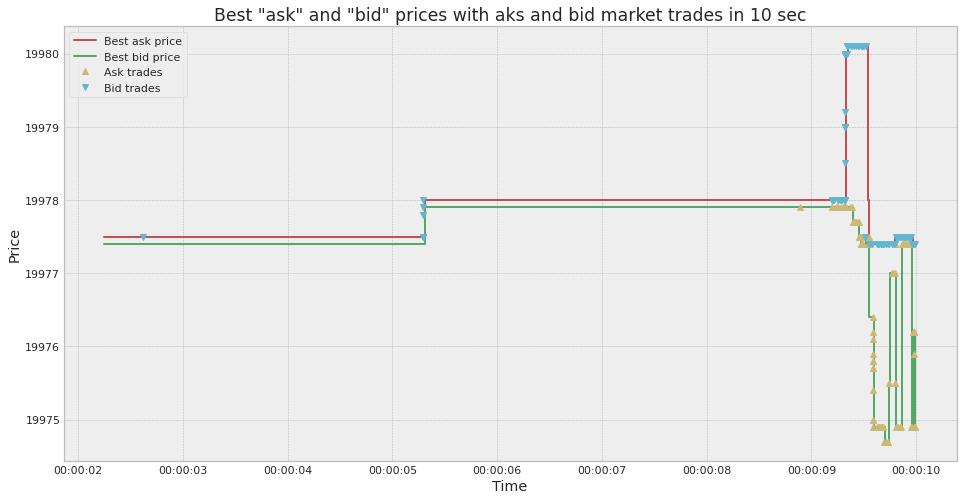

In [16]:
plt.step(ts_10sec_lobs, best_ask_10_sec, where='post', color='r', label='Best ask price')
plt.step(ts_10sec_lobs, best_bid_10_sec, where='post', color='g', label='Best bid price')
plt.plot(ts_ask_trades_10sec, ask_trades_10sec, 'y^', label='Ask trades')
plt.plot(ts_bid_trades_10sec, bid_trades_10sec, 'cv', label='Bid trades')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.title('Best "ask" and "bid" prices with aks and bid market trades in 10 sec')

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ts_10sec_lobs), y=list(best_ask_10_sec), line=dict(shape="hv", color="#F06A6A"), name="Best ask"))

fig.add_trace(go.Scatter(x=list(ts_10sec_lobs), y=list(best_bid_10_sec), line=dict(shape="hv", color="#33CFA5"), name="Best bid"))

fig.add_trace(go.Scatter(x=list(ts_ask_trades_10sec), y=list(ask_trades_10sec), mode='markers', name="Ask trades", marker=dict(symbol='arrow-down', color="#F6F926", size=6)))

fig.add_trace(go.Scatter(x=list(ts_bid_trades_10sec), y=list(bid_trades_10sec), mode='markers', name="Bid trades", marker=dict(symbol='arrow-up', color="#0DF9FF", size=6)))

fig.update_layout(
    title='Best "ask" and "bid" BTC prices with market trades in 10 sec',
    xaxis_title='Time',
    yaxis_title='Price')

fig.show()

We can see some activity in [9:10] time interval, let's look closely to it.

In [18]:
ts_1sec_lobs, lobs_1sec = take_sub_data(df=BTC_lobs, time_index='exchange_ts', start_time='2022-06-23 00:00:09.000', end_time='2022-06-23 00:00:10.000')
ts_1sec_trades, trades_1sec = take_sub_data(df=BTC_trades_clear, time_index='exchange_ts', start_time='2022-06-23 00:00:09.000', end_time='2022-06-23 00:00:10.000')

best_ask_1_sec = lobs_1sec.BTC_ask_price_0
best_bid_1_sec = lobs_1sec.BTC_bid_price_0
bid_trades_1sec = trades_1sec.loc[trades_1sec.aggro_side == 'BID'].price
ts_bid_trades_1sec = trades_1sec.loc[trades_1sec.aggro_side == 'BID'].exchange_ts
ask_trades_1sec = trades_1sec.loc[trades_1sec.aggro_side == 'ASK'].price
ts_ask_trades_1sec = trades_1sec.loc[trades_1sec.aggro_side == 'ASK'].exchange_ts

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ts_1sec_lobs), y=list(best_ask_1_sec), line=dict(shape="hv", color="#F06A6A"), name="Best ask"))

fig.add_trace(go.Scatter(x=list(ts_1sec_lobs), y=list(best_bid_1_sec), line=dict(shape="hv", color="#33CFA5"), name="Best bid"))

fig.add_trace(go.Scatter(x=list(ts_ask_trades_1sec), y=list(ask_trades_1sec), mode='markers', name="Ask trades", marker=dict(symbol='arrow-down', color="#F6F926", size=7)))

fig.add_trace(go.Scatter(x=list(ts_bid_trades_1sec), y=list(bid_trades_1sec), mode='markers', name="Bid trades", marker=dict(symbol='arrow-up', color="#0DF9FF", size=7)))

fig.update_layout(
    title='Best "ask" and "bid" BTC prices with market trades in 1 sec',
    xaxis_title='Time',
    yaxis_title='Price')

fig.show()

Text(0.5, 1.0, 'Best ask price in all time')

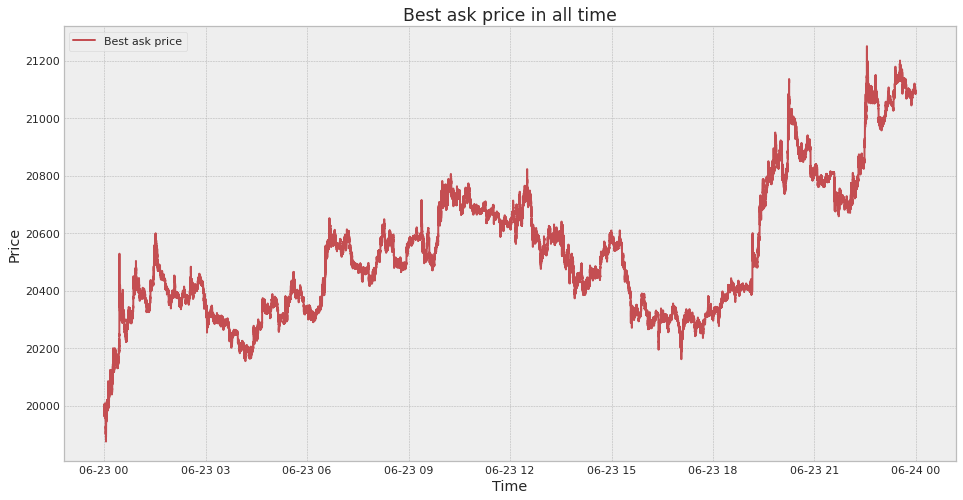

In [20]:
plt.plot(BTC_lobs.exchange_ts, BTC_lobs.BTC_ask_price_0, color='r', label='Best ask price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.title('Best ask price in all time')

Text(0.5, 1.0, 'All market trades in all time')

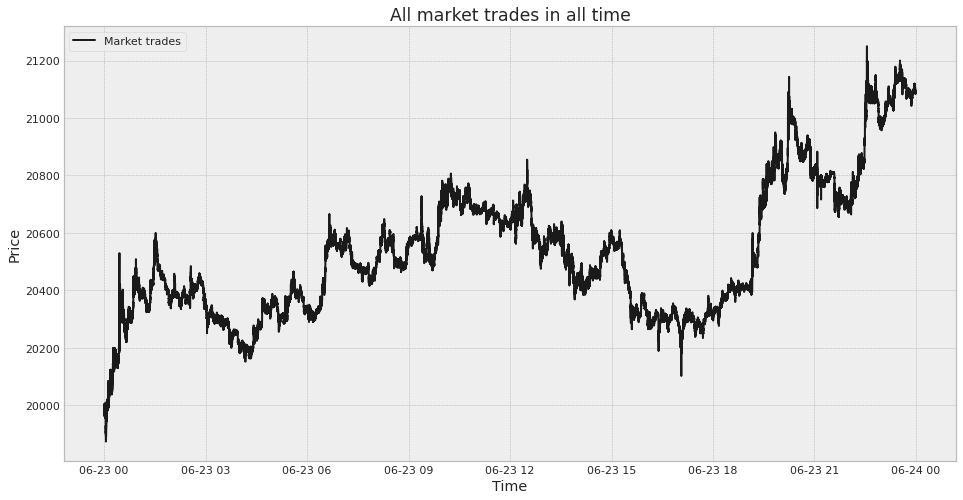

In [21]:
plt.plot(BTC_trades_clear.exchange_ts, BTC_trades_clear.price, color='k', label='Market trades')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.title('All market trades in all time')

## 2) Calculate statistics: 0.05 and 0.95 quantile, median, average, variation for any given quantities: trade size, size of some level of order book.

Let's add new colum _weighted_price_ which is scalar product of _price_ column by _size_ column.

In [22]:
BTC_trades_clear['weighted_price'] = BTC_trades_clear['price'] * BTC_trades_clear['size']

In [23]:
BTC_trades_clear.head()

receive_ts             exchange_ts aggro_side    price  \
0 2022-06-23 00:00:02.624789714 2022-06-23 00:00:02.623        BID  19977.5   
1 2022-06-23 00:00:05.293556247 2022-06-23 00:00:05.292        BID  19977.5   
2 2022-06-23 00:00:05.293628020 2022-06-23 00:00:05.292        BID  19977.5   
3 2022-06-23 00:00:05.293832021 2022-06-23 00:00:05.292        BID  19977.5   
4 2022-06-23 00:00:05.293929517 2022-06-23 00:00:05.292        BID  19977.5   

    size  weighted_price  
0  0.001         19.9775  
1  0.041        819.0775  
2  0.036        719.1900  
3  0.001         19.9775  
4  0.001         19.9775

So now we can extract some useful information from our data. Let's create new columns about trades placed at the same time.

In [24]:
def get_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function related only to DataFrame with market trades.
    This function groups the trades that the exchange splits for execution to collect the original market order.

    :param df: pd.DataFrame
        DF with market trades
    :return: pd.DataFrame
        New DF with aggregated market trades
    """

    size_of_trade = df.groupby(['exchange_ts'])['size'].agg('sum').rename('total_trade_size')
    min_price = df.groupby(['exchange_ts'])['price'].agg('min').rename('min_price')
    max_price = df.groupby(['exchange_ts'])['price'].agg('max').rename('max_price')
    diff_price = (max_price - min_price).rename('price_diff')
    n_trades = df.groupby(['exchange_ts'])['price'].agg('count').rename('n_exchange_trades')
    n_uniq_trades = df.groupby(['exchange_ts'])['price'].nunique().rename('n_unique_levels')
    trade_total_cost = df.groupby(['exchange_ts'])['weighted_price'].agg('sum').rename('total_cost_of_trade')
    avg_price = (trade_total_cost / size_of_trade).rename('avg_price')
    rec_ts_min = df.groupby(['exchange_ts'])['receive_ts'].agg('min').rename('receive_ts_min_price')
    rec_ts_max = df.groupby(['exchange_ts'])['receive_ts'].agg('max').rename('receive_ts_max_price')
    new_df = pd.concat([min_price, avg_price, max_price, diff_price, size_of_trade, trade_total_cost, n_trades, n_uniq_trades, rec_ts_min, rec_ts_max], axis=1)

    return new_df

In [25]:
BTC_bid_trades_grouped = get_info(BTC_trades_clear.loc[BTC_trades_clear.aggro_side == 'BID'])
BTC_ask_trades_grouped = get_info(BTC_trades_clear.loc[BTC_trades_clear.aggro_side == 'ASK'])
BTC_bid_trades_grouped['aggro_side'] = 'BID'
BTC_ask_trades_grouped['aggro_side'] = 'ASK'

In [26]:
BTC_bid_trades_grouped.head(3)

min_price     avg_price  max_price  price_diff  \
exchange_ts                                                               
2022-06-23 00:00:02.623    19977.5  19977.500000    19977.5         0.0   
2022-06-23 00:00:05.292    19977.5  19977.530233    19978.0         0.5   
2022-06-23 00:00:09.193    19978.0  19978.000000    19978.0         0.0   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:00:02.623             0.001              19.9775   
2022-06-23 00:00:05.292             0.086            1718.0676   
2022-06-23 00:00:09.193             0.150            2996.7000   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:00:02.623                  1                1   
2022-06-23 00:00:05.292                  7                4   
2022-06-23 00:00:09.193                  4                1   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:00:02.623 2022-06-23 00:00:02.624789714   
2022-06-23 00:00:05.292 2022-06-23 00:00:05.293556247   
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197011118   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:00:02.623 2022-06-23 00:00:02.624789714        BID  
2022-06-23 00:00:05.292 2022-06-23 00:00:05.294206928        BID  
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197224281        BID

In [27]:
BTC_ask_trades_grouped.head(3)

min_price  avg_price  max_price  price_diff  \
exchange_ts                                                            
2022-06-23 00:00:08.890    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.193    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.233    19977.9    19977.9    19977.9         0.0   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:00:08.890             0.020             399.5580   
2022-06-23 00:00:09.193             0.233            4654.8507   
2022-06-23 00:00:09.233             0.032             639.2928   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:00:08.890                  1                1   
2022-06-23 00:00:09.193                  2                1   
2022-06-23 00:00:09.233                  1                1   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:00:08.890 2022-06-23 00:00:08.891268324   
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197332686   
2022-06-23 00:00:09.233 2022-06-23 00:00:09.234423582   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:00:08.890 2022-06-23 00:00:08.891268324        ASK  
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197580020        ASK  
2022-06-23 00:00:09.233 2022-06-23 00:00:09.234423582        ASK

In [28]:
BTC_bid_trades_grouped.describe()

min_price     avg_price     max_price    price_diff  \
count  1.090281e+06  1.090281e+06  1.090281e+06  1.090281e+06   
mean   2.055161e+04  2.055169e+04  2.055175e+04  1.460550e-01   
std    2.426639e+02  2.426807e+02  2.426917e+02  7.424158e-01   
min    1.987500e+04  1.987504e+04  1.987520e+04  0.000000e+00   
25%    2.036300e+04  2.036310e+04  2.036320e+04  0.000000e+00   
50%    2.052320e+04  2.052340e+04  2.052350e+04  0.000000e+00   
75%    2.070920e+04  2.070920e+04  2.070930e+04  0.000000e+00   
max    2.125000e+04  2.125000e+04  2.125000e+04  1.200000e+02   

       total_trade_size  total_cost_of_trade  n_exchange_trades  \
count      1.090281e+06         1.090281e+06       1.090281e+06   
mean       3.332816e-01         6.857492e+03       2.673890e+00   
std        1.586715e+00         3.266904e+04       5.135856e+00   
min        1.000000e-03         1.987520e+01       1.000000e+00   
25%        1.000000e-03         2.073570e+01       1.000000e+00   
50%        1.500000e-02         3.170145e+02       1.000000e+00   
75%        1.180000e-01         2.425265e+03       2.000000e+00   
max        2.357930e+02         4.930337e+06       1.460000e+02   

       n_unique_levels  
count     1.090281e+06  
mean      1.508101e+00  
std       1.979024e+00  
min       1.000000e+00  
25%       1.000000e+00  
50%       1.000000e+00  
75%       1.000000e+00  
max       8.100000e+01

In [29]:
BTC_ask_trades_grouped.describe()

min_price     avg_price     max_price    price_diff  \
count  1.118613e+06  1.118613e+06  1.118613e+06  1.118613e+06   
mean   2.056305e+04  2.056310e+04  2.056318e+04  1.351185e-01   
std    2.434955e+02  2.435008e+02  2.435111e+02  6.813204e-01   
min    1.987400e+04  1.987400e+04  1.987400e+04  0.000000e+00   
25%    2.037400e+04  2.037400e+04  2.037400e+04  0.000000e+00   
50%    2.053980e+04  2.053990e+04  2.053990e+04  0.000000e+00   
75%    2.071990e+04  2.071990e+04  2.072000e+04  0.000000e+00   
max    2.123230e+04  2.123230e+04  2.124900e+04  1.229000e+02   

       total_trade_size  total_cost_of_trade  n_exchange_trades  \
count      1.118613e+06         1.118613e+06       1.118613e+06   
mean       2.998798e-01         6.165807e+03       2.514144e+00   
std        1.438336e+00         2.959544e+04       4.535179e+00   
min        1.000000e-03         1.987400e+01       1.000000e+00   
25%        1.000000e-03         2.074300e+01       1.000000e+00   
50%        1.500000e-02         3.085275e+02       1.000000e+00   
75%        1.060000e-01         2.188672e+03       2.000000e+00   
max        2.160870e+02         4.454632e+06       1.290000e+02   

       n_unique_levels  
count     1.118613e+06  
mean      1.482149e+00  
std       1.860601e+00  
min       1.000000e+00  
25%       1.000000e+00  
50%       1.000000e+00  
75%       1.000000e+00  
max       6.300000e+01

In [30]:
BTC_bid_trades_grouped.price_diff.quantile(1)

120.0

In [31]:
def get_stats(data: typing.Union[pd.DataFrame, pd.Series]) -> pd.DataFrame:
    """
    Function which extract statistics from given data

    :param data: pd.DataFrame or pd.Series
        Data from which we want to extract statistics
    :return: pd.DataFrame
        new DF with useful statistics
    """

    min_val = data.min().rename('min_value')
    q_05 = data.quantile(0.05).rename('5%_quantile')
    q_25 = data.quantile(0.25).rename('25%_quantile')
    q_50 = data.quantile(0.5).rename('50%_quantile')
    q_75 = data.quantile(0.75).rename('75%_quantile')
    q_95 = data.quantile(.95).rename('95%_quantile')
    q_99 = data.quantile(.99).rename('99%_quantile')
    q_999 = data.quantile(.999).rename('99.9%_quantile')
    q_9999 = data.quantile(.9999).rename('99.99%_quantile')
    max_val = data.max().rename('max_value')
    mean_val = data.mean().rename('avg_value')
    median_val = data.median().rename('median_value')
    std = data.std().rename('variance')
    n_uniq = data.nunique().rename('n_unique_values')
    statistics = [min_val, q_05, q_25, q_50, q_75, q_95, q_99, q_999, q_9999, max_val, mean_val, median_val, std, n_uniq]
    data_stats = pd.concat(statistics, axis=1).transpose()

    return data_stats

In [32]:
stat_cols = ['price_diff', 'total_trade_size', 'total_cost_of_trade', 'n_unique_levels']
ask_stats = get_stats(BTC_ask_trades_grouped[stat_cols])
bid_stats = get_stats(BTC_bid_trades_grouped[stat_cols])
best_ask_bid_vol_stats = get_stats(BTC_lobs[['BTC_ask_vol_0', 'BTC_bid_vol_0']])

Ask trades statistics

In [33]:
ask_stats

price_diff  total_trade_size  total_cost_of_trade  \
min_value          0.000000          0.001000         1.987400e+01   
5%_quantile        0.000000          0.001000         2.031540e+01   
25%_quantile       0.000000          0.001000         2.074300e+01   
50%_quantile       0.000000          0.015000         3.085275e+02   
75%_quantile       0.000000          0.106000         2.188672e+03   
95%_quantile       0.900000          1.293000         2.656720e+04   
99%_quantile       2.400000          5.063000         1.044460e+05   
99.9%_quantile     6.000000         18.001164         3.705362e+05   
99.99%_quantile   19.527760         41.849344         8.575173e+05   
max_value        122.900000        216.087000         4.454632e+06   
avg_value          0.135118          0.299880         6.165807e+03   
median_value       0.000000          0.015000         3.085275e+02   
variance           0.681320          1.438336         2.959544e+04   
n_unique_values  388.000000      16535.000000         6.083130e+05   

                 n_unique_levels  
min_value               1.000000  
5%_quantile             1.000000  
25%_quantile            1.000000  
50%_quantile            1.000000  
75%_quantile            1.000000  
95%_quantile            4.000000  
99%_quantile           10.000000  
99.9%_quantile         22.000000  
99.99%_quantile        35.000000  
max_value              63.000000  
avg_value               1.482149  
median_value            1.000000  
variance                1.860601  
n_unique_values        55.000000

Bid trades statistics

In [34]:
bid_stats

price_diff  total_trade_size  total_cost_of_trade  \
min_value          0.000000          0.001000         1.987520e+01   
5%_quantile        0.000000          0.001000         2.031360e+01   
25%_quantile       0.000000          0.001000         2.073570e+01   
50%_quantile       0.000000          0.015000         3.170145e+02   
75%_quantile       0.000000          0.118000         2.425265e+03   
95%_quantile       1.000000          1.457000         2.998560e+04   
99%_quantile       2.500000          5.715000         1.177378e+05   
99.9%_quantile     7.600000         20.203160         4.152154e+05   
99.99%_quantile   24.394400         46.342132         9.575947e+05   
max_value        120.000000        235.793000         4.930337e+06   
avg_value          0.146055          0.333282         6.857492e+03   
median_value       0.000000          0.015000         3.170145e+02   
variance           0.742416          1.586715         3.266904e+04   
n_unique_values  540.000000      17469.000000         5.996630e+05   

                 n_unique_levels  
min_value               1.000000  
5%_quantile             1.000000  
25%_quantile            1.000000  
50%_quantile            1.000000  
75%_quantile            1.000000  
95%_quantile            4.000000  
99%_quantile           11.000000  
99.9%_quantile         23.000000  
99.99%_quantile        39.000000  
max_value              81.000000  
avg_value               1.508101  
median_value            1.000000  
variance                1.979024  
n_unique_values        61.000000

Statistics for best ask and bid volumes.

In [35]:
best_ask_bid_vol_stats

BTC_ask_vol_0  BTC_bid_vol_0
min_value             0.001000       0.001000
5%_quantile           0.014000       0.012000
25%_quantile          0.347000       0.340000
50%_quantile          1.358000       1.377000
75%_quantile          3.377000       3.525000
95%_quantile          8.907000       9.208250
99%_quantile         15.364000      16.100450
99.9%_quantile       38.234805      47.031320
99.99%_quantile     116.648000     167.151000
max_value           434.138000     905.930000
avg_value             2.561160       2.682905
median_value          1.358000       1.377000
variance              4.282262       5.588091
n_unique_values   25153.000000   26306.000000

Let's plot some histograms for size of trades.

## 3) Plot histograms of distibutions:
a) for trades
b) for sizes of 5-th levels of order books. Needs to build separately for each side of the order book (bid/ask), the volume at the k-th level is calculated cumulatively (the sum of the first k-levels).

3.a

[Text(0.5, 1.0, 'Histogram of bid trade sizes in log scale')]

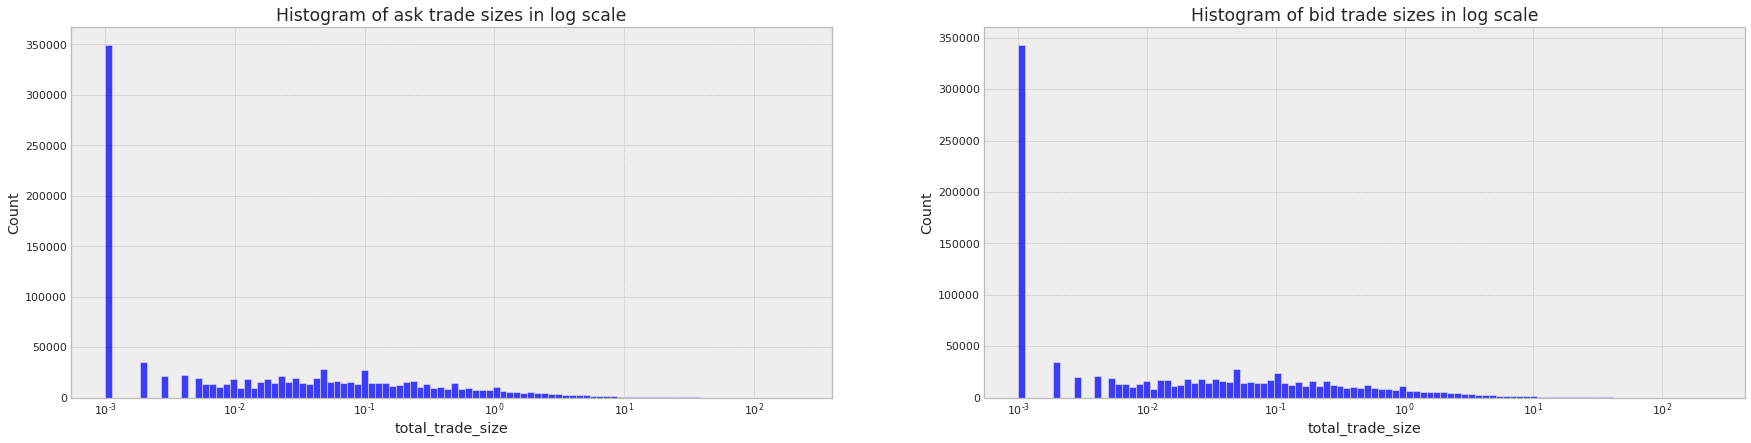

In [36]:
plt.subplots(nrows=1, ncols=2, figsize=(30,15))

plt.subplot(221)
sns.histplot(data=BTC_ask_trades_grouped, x='total_trade_size', bins=100, log_scale=True, ).set(title='Histogram of ask trade sizes in log scale', )
plt.subplot(222)
sns.histplot(data=BTC_bid_trades_grouped, x='total_trade_size', bins=100, log_scale=True, ).set(title='Histogram of bid trade sizes in log scale', )

[Text(0.5, 1.0, 'Histogram of bid trade sizes in log scale (without minimum size)')]

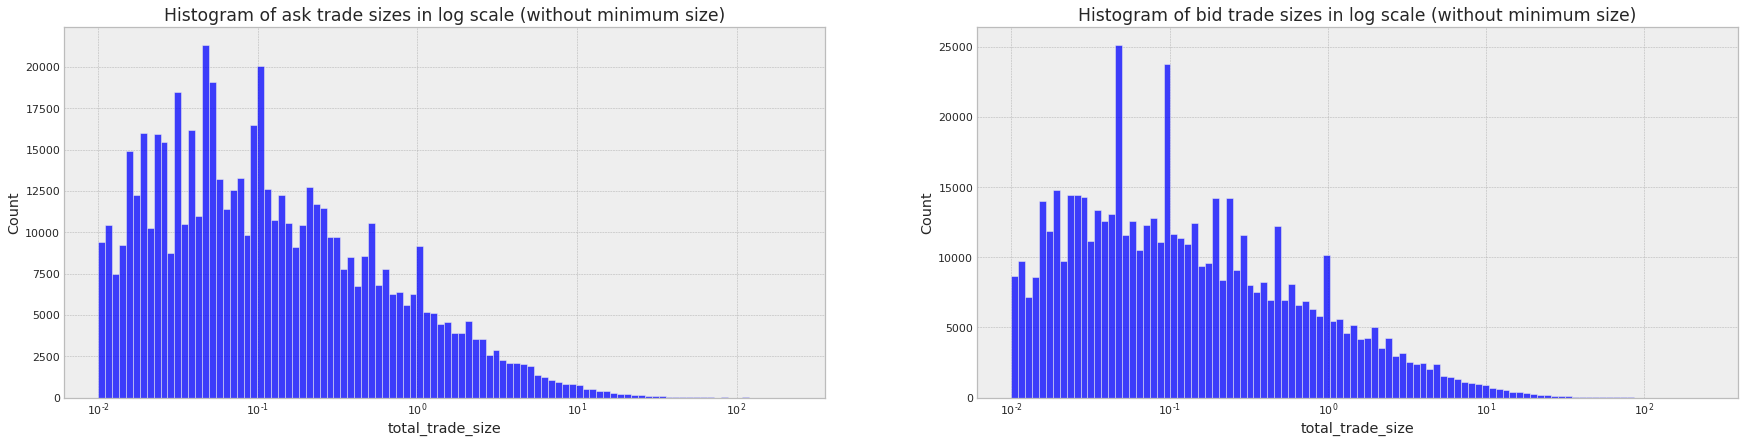

In [37]:
plt.subplots(nrows=1, ncols=2, figsize=(30,15))

plt.subplot(221)
sns.histplot(data=BTC_ask_trades_grouped.loc[BTC_ask_trades_grouped.total_trade_size > 0.01],
             x='total_trade_size', bins=100, log_scale=True, ).set(title='Histogram of ask trade sizes in log scale (without minimum size)')

plt.subplot(222)
sns.histplot(data=BTC_bid_trades_grouped.loc[BTC_bid_trades_grouped.total_trade_size > 0.01],
             x='total_trade_size', bins=100, log_scale=True, ).set(title='Histogram of bid trade sizes in log scale (without minimum size)')

[Text(0.5, 1.0, 'Histogram of costs of bid trades in log scale')]

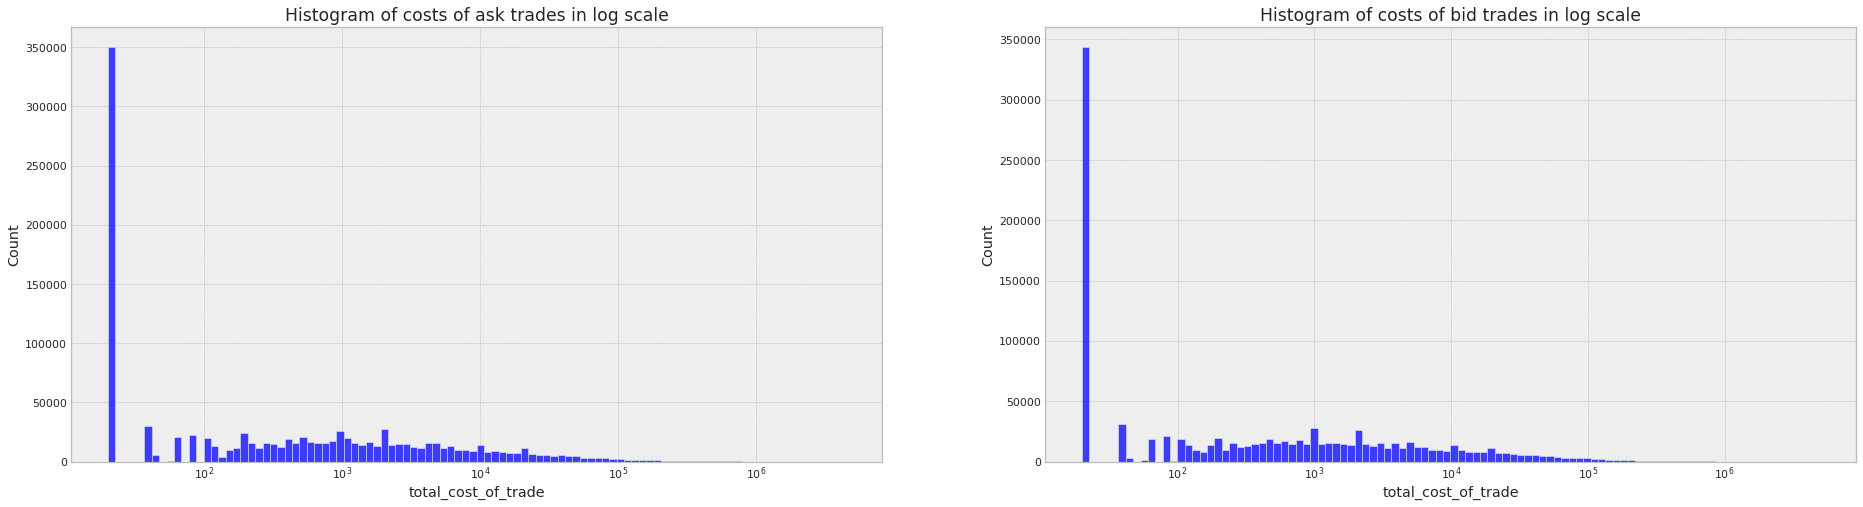

In [38]:
plt.subplots(nrows=1, ncols=2, figsize=(32,8))

plt.subplot(121)
sns.histplot(data=BTC_ask_trades_grouped, x='total_cost_of_trade', bins=100, log_scale=True, ).set(title='Histogram of costs of ask trades in log scale')

plt.subplot(122)
sns.histplot(data=BTC_bid_trades_grouped, x='total_cost_of_trade', bins=100, log_scale=True, ).set(title='Histogram of costs of bid trades in log scale')

[Text(0.5, 1.0, 'Histogram of costs of ask trades in log scale (cost > 50 usdt)')]

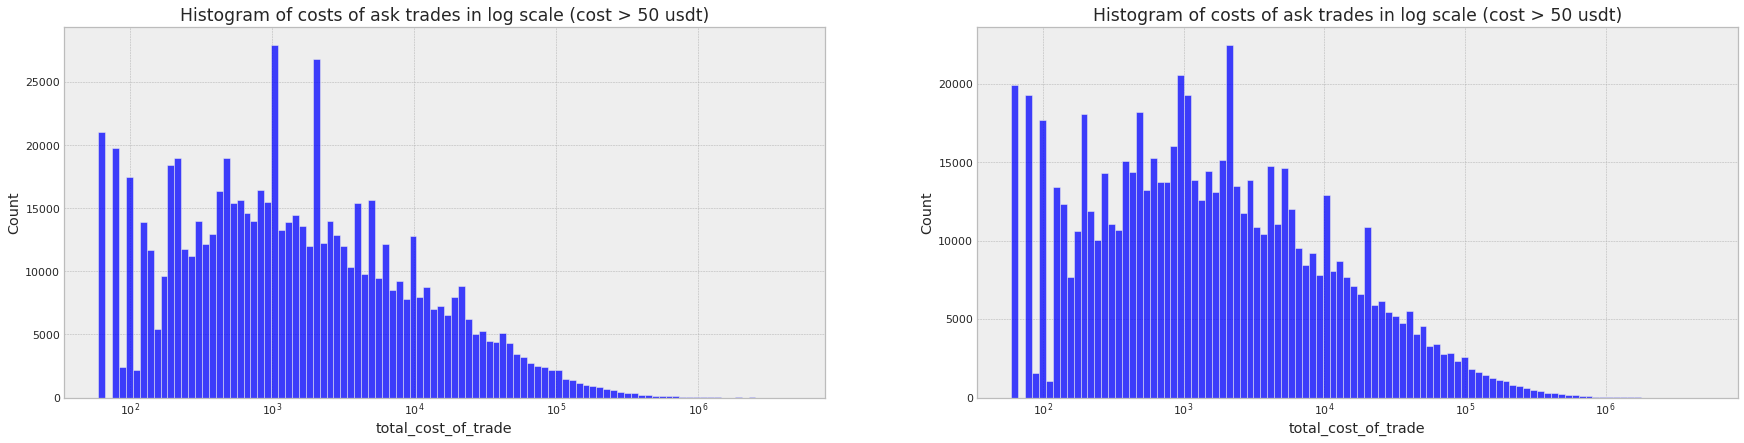

In [39]:
plt.subplots(nrows=1, ncols=2, figsize=(30,15))

plt.subplot(221)
sns.histplot(data=BTC_ask_trades_grouped.loc[BTC_ask_trades_grouped.total_cost_of_trade > 50],
             x='total_cost_of_trade', bins=100, log_scale=True, ).set(title='Histogram of costs of ask trades in log scale (cost > 50 usdt)')

plt.subplot(222)
sns.histplot(data=BTC_bid_trades_grouped.loc[BTC_bid_trades_grouped.total_cost_of_trade > 50],
             x='total_cost_of_trade', bins=100, log_scale=True, ).set(title='Histogram of costs of ask trades in log scale (cost > 50 usdt)')

3.b

In [40]:
def calc_cumulative_volume(df: pd.DataFrame, currency: str = 'BTC'):
    """
    Function which creates new columns with cumulative volumes.

    Parameters:
    -----------
    df: pd.DataFrame
        Order book data with volumes on each level from order book.
    currency: str
        BTC or ETH
    :return:
    """

    cumul_ask_vol = df[f'{currency}_ask_vol_0'].copy()
    cumul_bid_vol = df[f'{currency}_bid_vol_0'].copy()
    df[f'{currency}_ask_cum_vol_0'] = cumul_ask_vol
    df[f'{currency}_bid_cum_vol_0'] = cumul_bid_vol

    for p in range(1, 6):
        cumul_ask_vol += df[f'{currency}_ask_vol_{p}']
        cumul_bid_vol += df[f'{currency}_bid_vol_{p}']
        df[f'{currency}_ask_cum_vol_{p}'] = cumul_ask_vol
        df[f'{currency}_bid_cum_vol_{p}'] = cumul_bid_vol

In [41]:
calc_cumulative_volume(BTC_lobs)

In [42]:
BTC_lobs.head(3)

receive_ts             exchange_ts  BTC_ask_price_0  \
0 2022-06-23 00:00:02.250125991 2022-06-23 00:00:02.249          19977.5   
1 2022-06-23 00:00:02.657844605 2022-06-23 00:00:02.655          19977.5   
2 2022-06-23 00:00:03.346968722 2022-06-23 00:00:03.346          19977.5   

   BTC_ask_vol_0  BTC_bid_price_0  BTC_bid_vol_0  BTC_ask_price_1  \
0          0.079          19977.4         12.381          19977.8   
1          0.078          19977.4         12.381          19977.8   
2          0.079          19977.4         12.381          19977.8   

   BTC_ask_vol_1  BTC_bid_price_1  BTC_bid_vol_1  ...  BTC_ask_cum_vol_1  \
0          0.003          19976.7          0.066  ...              0.082   
1          0.003          19977.3          0.126  ...              0.081   
2          0.003          19977.3          0.126  ...              0.082   

   BTC_bid_cum_vol_1  BTC_ask_cum_vol_2  BTC_bid_cum_vol_2  BTC_ask_cum_vol_3  \
0             12.447              0.085             12.497              1.368   
1             12.507              0.084             13.564              1.367   
2             12.507              0.085             13.564              1.368   

   BTC_bid_cum_vol_3  BTC_ask_cum_vol_4  BTC_bid_cum_vol_4  BTC_ask_cum_vol_5  \
0             12.643              1.369             12.848              1.981   
1             13.630              1.368             13.680              1.980   
2             13.630              1.369             13.680              1.981   

   BTC_bid_cum_vol_5  
0             13.094  
1             13.826  
2             13.826  

[3 rows x 54 columns]

In [43]:
def hists_of_cumulative_volume(df: pd.DataFrame, ask_cols: str, bid_cols: str, n_bins: int = 100, log_sc: bool = False):
    plt.subplots(figsize=(25, 30))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)

    for k in range(6):
        plt.subplot(6, 2, 2*k+1)
        sns.histplot(data=df, x=f'{ask_cols}_{k}', bins=n_bins, log_scale=log_sc).set(title=f'Histogram of ask cumulative volume at level {k} (log_scale={log_sc})')

        plt.subplot(6, 2, 2*k+2)
        sns.histplot(data=df, x=f'{bid_cols}_{k}', bins=n_bins, log_scale=log_sc).set(title=f'Histogram of bid cumulative volume at level {k} (log_scale={log_sc})')

    plt.show()

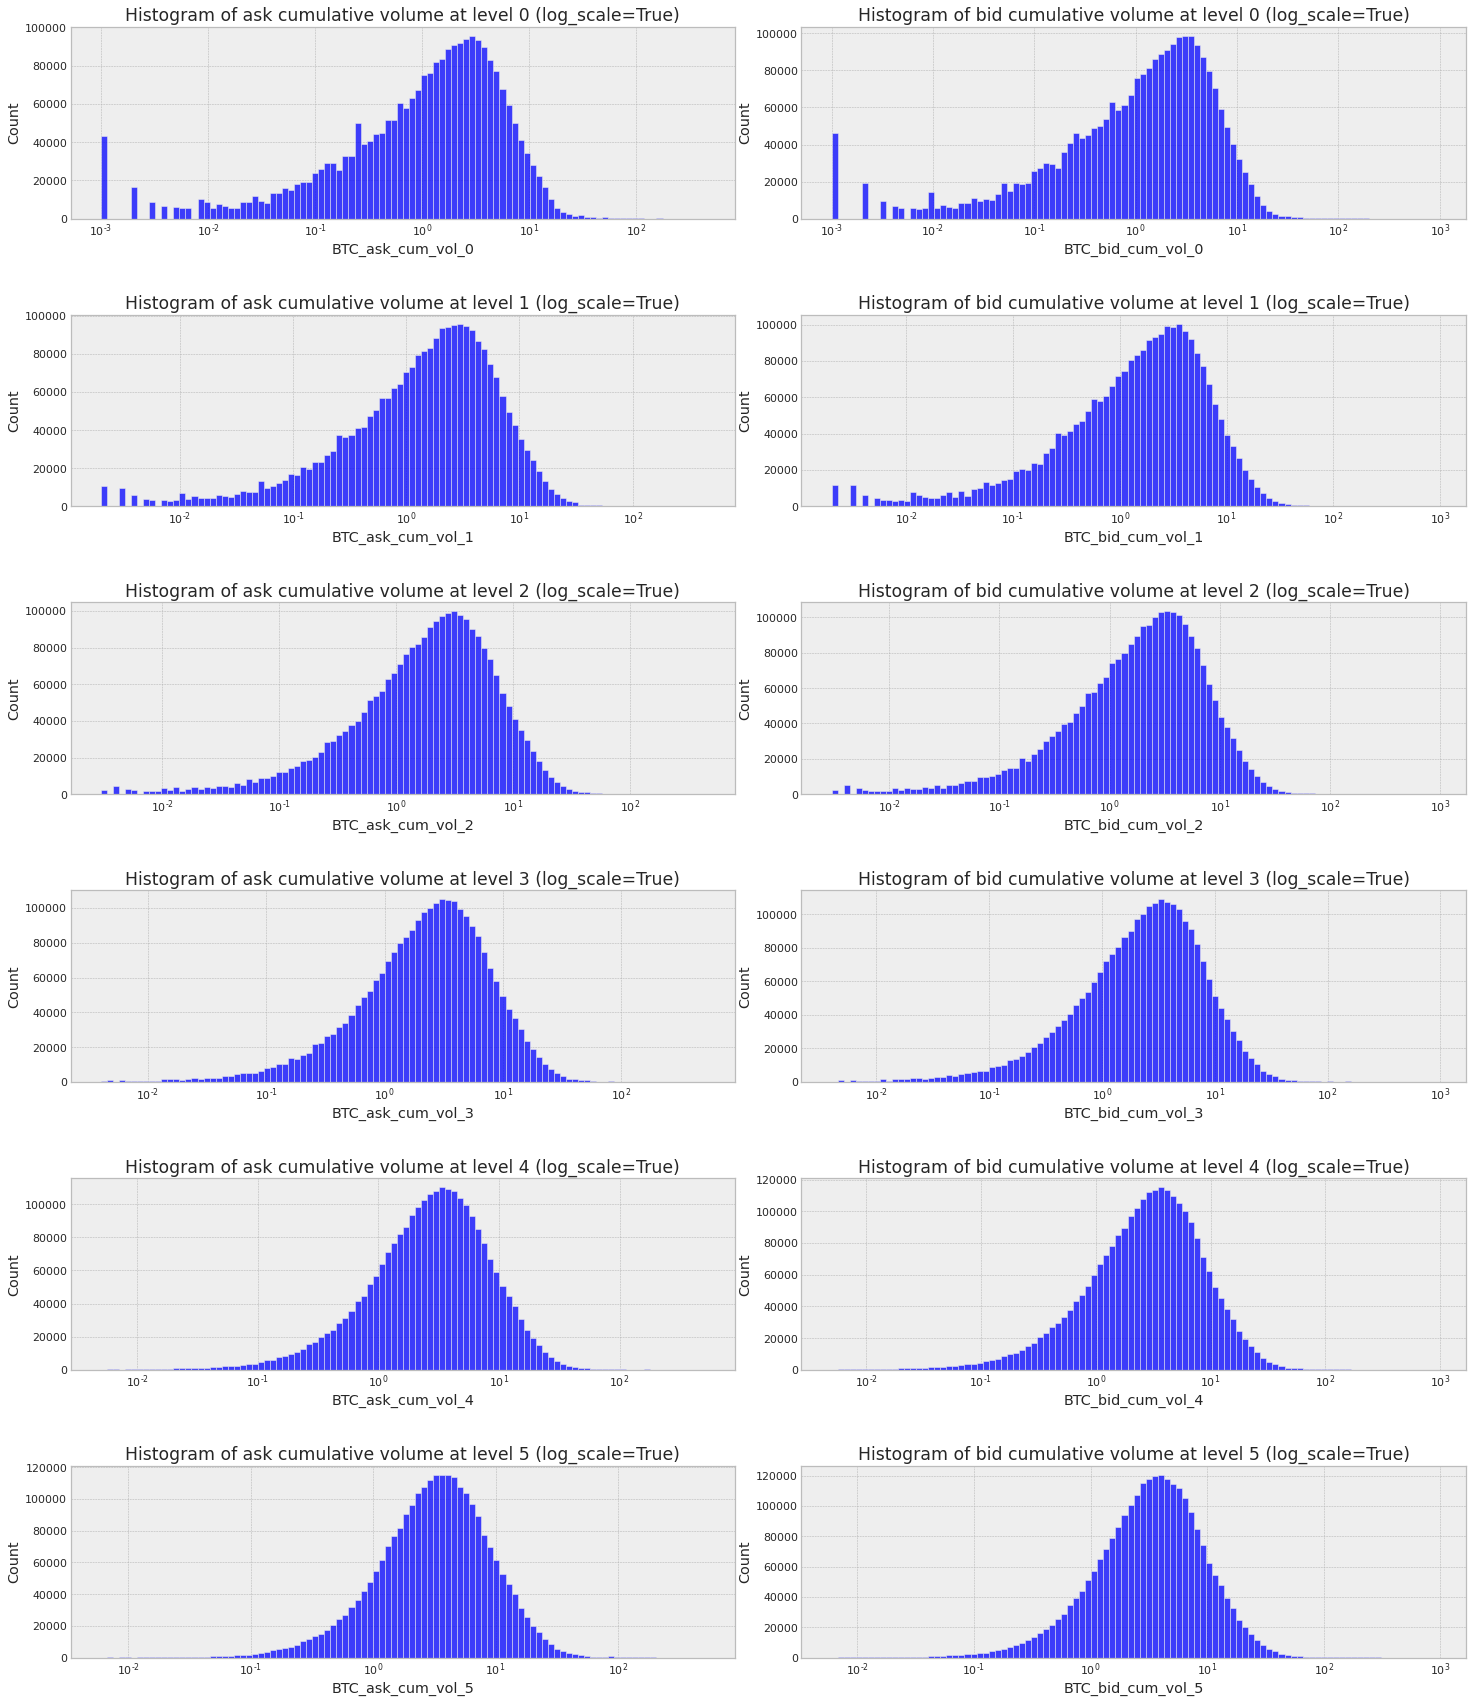

In [44]:
hists_of_cumulative_volume(df=BTC_lobs, ask_cols='BTC_ask_cum_vol', bid_cols='BTC_bid_cum_vol', log_sc=True)

## 4) Also needs to build a graph of the size of the "breakthrough" of the order book on the size of the trade, how much the glass "breaks through" as a result of the trade.
The "breakthrough" value of the order book  is the value of the change in best_price as a result of a trade. It is also worth counting separately for each side.

In [45]:
BTC_ask_trades_grouped.head()

min_price  avg_price  max_price  price_diff  \
exchange_ts                                                            
2022-06-23 00:00:08.890    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.193    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.233    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.244    19977.9    19977.9    19977.9         0.0   
2022-06-23 00:00:09.253    19977.9    19977.9    19977.9         0.0   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:00:08.890             0.020             399.5580   
2022-06-23 00:00:09.193             0.233            4654.8507   
2022-06-23 00:00:09.233             0.032             639.2928   
2022-06-23 00:00:09.244             0.021             419.5359   
2022-06-23 00:00:09.253             0.010             199.7790   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:00:08.890                  1                1   
2022-06-23 00:00:09.193                  2                1   
2022-06-23 00:00:09.233                  1                1   
2022-06-23 00:00:09.244                  1                1   
2022-06-23 00:00:09.253                  1                1   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:00:08.890 2022-06-23 00:00:08.891268324   
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197332686   
2022-06-23 00:00:09.233 2022-06-23 00:00:09.234423582   
2022-06-23 00:00:09.244 2022-06-23 00:00:09.247132101   
2022-06-23 00:00:09.253 2022-06-23 00:00:09.255048304   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:00:08.890 2022-06-23 00:00:08.891268324        ASK  
2022-06-23 00:00:09.193 2022-06-23 00:00:09.197580020        ASK  
2022-06-23 00:00:09.233 2022-06-23 00:00:09.234423582        ASK  
2022-06-23 00:00:09.244 2022-06-23 00:00:09.247132101        ASK  
2022-06-23 00:00:09.253 2022-06-23 00:00:09.255048304        ASK

In [46]:
ask_trade_size = BTC_ask_trades_grouped.total_trade_size
ask_price_diff = BTC_ask_trades_grouped.price_diff
ask_br_n_levels = BTC_ask_trades_grouped.n_unique_levels

In [47]:
bid_trade_size = BTC_bid_trades_grouped.total_trade_size
bid_price_diff = BTC_bid_trades_grouped.price_diff
bid_br_n_levels = BTC_bid_trades_grouped.n_unique_levels

### Ask side

Text(0.5, 1.0, 'Scatter plot for size of ask market trade and best bid price delta (absolute difference between best price before trade and after)')

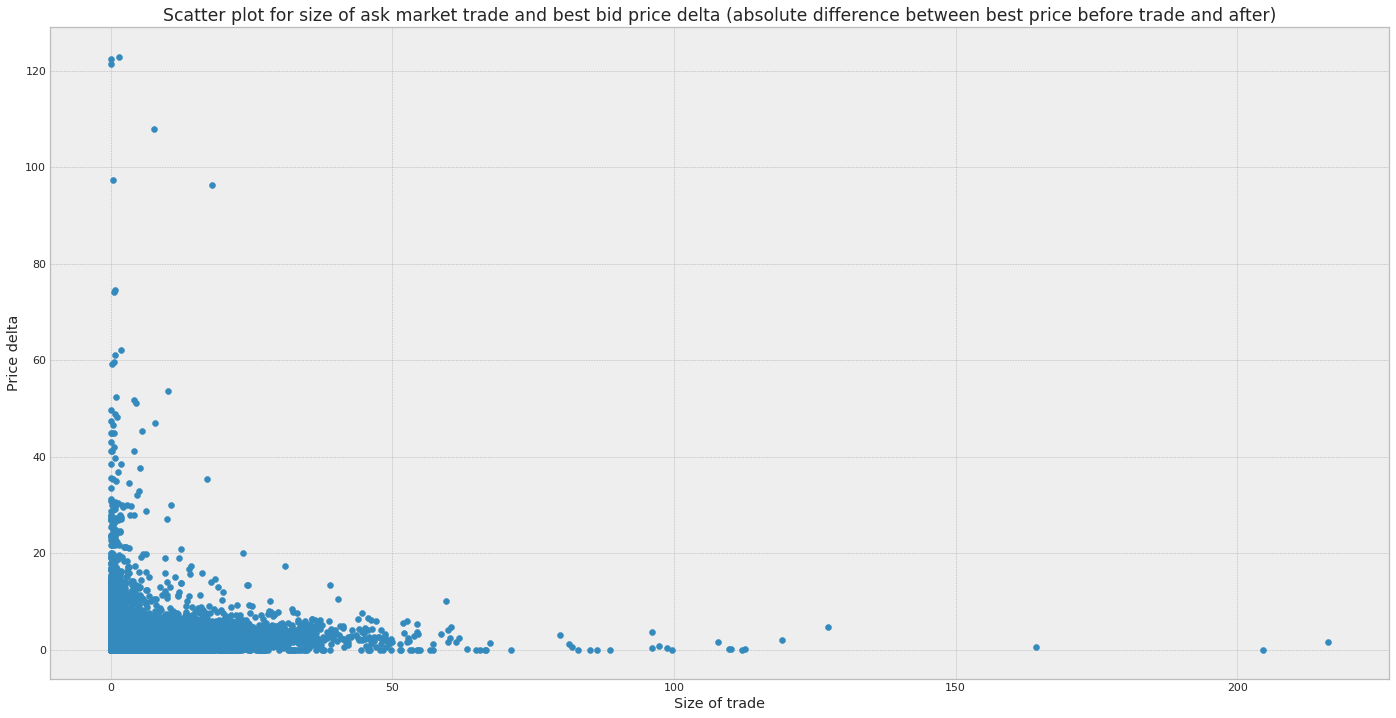

In [48]:
plt.figure(figsize=(24,12))
plt.scatter(x=ask_trade_size, y=ask_price_diff)
plt.xlabel('Size of trade')
plt.ylabel('Price delta')
plt.title('Scatter plot for size of ask market trade and best bid price delta (absolute difference between best price before trade and after)')

It's quite unusual picture (as naive approach we can expect that there should be linear like dependence between size of trade and price delta, but it's not). let's try to understand why we see that picture. So we can analise large deltas in our data.

In [49]:
BTC_ask_trades_grouped.loc[ask_price_diff > 100]

min_price     avg_price  max_price  price_diff  \
exchange_ts                                                               
2022-06-23 00:27:07.603    20392.1  20393.636539    20500.0       107.9   
2022-06-23 00:27:07.606    20392.1  20497.752778    20513.5       121.4   
2022-06-23 00:27:07.609    20392.1  20407.758497    20515.0       122.9   
2022-06-23 00:27:07.610    20392.1  20416.600000    20514.6       122.5   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:27:07.603             7.685          156725.0968   
2022-06-23 00:27:07.606             0.036             737.9191   
2022-06-23 00:27:07.609             1.424           29060.6481   
2022-06-23 00:27:07.610             0.010             204.1660   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:27:07.603                 47                8   
2022-06-23 00:27:07.606                  3                3   
2022-06-23 00:27:07.609                 31                5   
2022-06-23 00:27:07.610                  2                2   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:27:07.603 2022-06-23 00:27:07.710791439   
2022-06-23 00:27:07.606 2022-06-23 00:27:07.725421382   
2022-06-23 00:27:07.609 2022-06-23 00:27:07.726712439   
2022-06-23 00:27:07.610 2022-06-23 00:27:07.727658044   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:27:07.603 2022-06-23 00:27:07.714146869        ASK  
2022-06-23 00:27:07.606 2022-06-23 00:27:07.725501596        ASK  
2022-06-23 00:27:07.609 2022-06-23 00:27:07.727377467        ASK  
2022-06-23 00:27:07.610 2022-06-23 00:27:07.727706947        ASK

As we can see the first trade contains big size, so it's eliminate many of liquidity from orderbook. Other trades following at near time.

Let's look at another interval for deltas.

In [50]:
BTC_ask_trades_grouped.loc[(ask_price_diff > 90) & (ask_price_diff < 100)]

min_price     avg_price  max_price  price_diff  \
exchange_ts                                                               
2022-06-23 00:27:01.946    20272.7  20284.842995    20370.0        97.3   
2022-06-23 00:27:07.586    20403.8  20407.911255    20500.0        96.2   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:27:01.946             0.414            8397.9250   
2022-06-23 00:27:07.586            17.947          366260.7833   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:27:01.946                 16                3   
2022-06-23 00:27:07.586                 42               22   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:27:01.946 2022-06-23 00:27:02.081718061   
2022-06-23 00:27:07.586 2022-06-23 00:27:07.698005736   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:27:01.946 2022-06-23 00:27:02.082816071        ASK  
2022-06-23 00:27:07.586 2022-06-23 00:27:07.698649222        ASK

Not so interesting, try another one.

In [51]:
BTC_ask_trades_grouped.loc[(ask_price_diff > 40) & (ask_price_diff < 90)]

min_price     avg_price  max_price  price_diff  \
exchange_ts                                                               
2022-06-23 00:26:59.078    20240.1  20244.243694    20291.3        51.2   
2022-06-23 00:26:59.386    20248.9  20268.564286    20290.0        41.1   
2022-06-23 00:27:01.490    20291.9  20314.134542    20333.0        41.1   
2022-06-23 00:27:02.025    20299.8  20311.786237    20374.0        74.2   
2022-06-23 00:27:03.554    20400.0  20400.311532    20447.0        47.0   
2022-06-23 00:27:03.557    20400.0  20411.524390    20445.0        45.0   
2022-06-23 00:27:03.558    20383.9  20398.725296    20446.0        62.1   
2022-06-23 06:39:29.792    20599.0  20617.175732    20660.0        61.0   
2022-06-23 12:30:17.695    20800.0  20826.828947    20845.0        45.0   
2022-06-23 12:30:17.696    20800.0  20834.329250    20845.0        45.0   
2022-06-23 12:30:18.855    20797.4  20798.057002    20849.7        52.3   
2022-06-23 12:30:18.877    20796.1  20798.112845    20849.7        53.6   
2022-06-23 12:30:18.880    20795.4  20796.789617    20854.7        59.3   
2022-06-23 19:09:45.269    20399.4  20434.705952    20449.0        49.6   
2022-06-23 19:09:57.053    20496.2  20513.918182    20538.1        41.9   
2022-06-23 19:09:57.094    20495.5  20529.911085    20570.0        74.5   
2022-06-23 19:22:44.091    20649.2  20659.393220    20698.0        48.8   
2022-06-23 19:22:44.099    20648.3  20662.457521    20700.0        51.7   
2022-06-23 19:22:44.100    20648.3  20648.597508    20708.0        59.7   
2022-06-23 19:22:44.104    20671.8  20708.536028    20720.0        48.2   
2022-06-23 20:12:32.282    20828.5  20856.670487    20875.0        46.5   
2022-06-23 20:13:03.932    21033.6  21078.273077    21081.0        47.4   
2022-06-23 20:13:04.665    21043.3  21064.761702    21086.4        43.1   
2022-06-23 22:32:59.262    21204.7  21223.454772    21245.9        41.2   
2022-06-23 22:32:59.265    21203.6  21208.349655    21249.0        45.4   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:26:59.078             4.456           90208.3499   
2022-06-23 00:26:59.386             0.098            1986.3193   
2022-06-23 00:27:01.490             4.163           84567.7421   
2022-06-23 00:27:02.025             0.574           11658.9653   
2022-06-23 00:27:03.554             7.874          160632.0530   
2022-06-23 00:27:03.557             0.328            6694.9800   
2022-06-23 00:27:03.558             1.771           36126.1425   
2022-06-23 06:39:29.792             0.717           14782.5150   
2022-06-23 12:30:17.695             0.076            1582.8390   
2022-06-23 12:30:17.696             0.653           13604.8170   
2022-06-23 12:30:18.855             1.014           21089.2298   
2022-06-23 12:30:18.877            10.144          210976.0567   
2022-06-23 12:30:18.880             0.183            3805.8125   
2022-06-23 19:09:45.269             0.084            1716.5153   
2022-06-23 19:09:57.053             0.693           14216.1453   
2022-06-23 19:09:57.094             0.866           17778.9030   
2022-06-23 19:22:44.091             0.708           14626.8504   
2022-06-23 19:22:44.099             4.188           86534.3721   
2022-06-23 19:22:44.100             0.602           12430.4557   
2022-06-23 19:22:44.104             1.163           24084.0274   
2022-06-23 20:12:32.282             0.349            7278.9780   
2022-06-23 20:13:03.932             0.052            1096.0702   
2022-06-23 20:13:04.665             0.094            1980.0876   
2022-06-23 22:32:59.262             0.241            5114.8526   
2022-06-23 22:32:59.265             5.651          119848.3839   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:26:59.078                 19               14   
2022-06-23 00:26:59.386    

Hmm, something happens at first 27 minutes on exchange.

In [52]:
BTC_ask_trades_grouped.loc[(ask_price_diff > 10) & (ask_price_diff < 40)]

min_price     avg_price  max_price  price_diff  \
exchange_ts                                                               
2022-06-23 00:15:48.559    20158.0  20164.337370    20172.9        14.9   
2022-06-23 00:15:49.973    20172.5  20181.126882    20195.0        22.5   
2022-06-23 00:15:49.990    20171.2  20172.284034    20191.3        20.1   
2022-06-23 00:15:50.002    20171.2  20176.225000    20191.3        20.1   
2022-06-23 00:15:51.143    20185.8  20187.298091    20199.0        13.2   
...                            ...           ...        ...         ...   
2022-06-23 22:32:59.239    21217.6  21219.044601    21228.1        10.5   
2022-06-23 22:32:59.333    21203.6  21208.069000    21222.0        18.4   
2022-06-23 22:33:01.819    21213.0  21219.878333    21223.8        10.8   
2022-06-23 22:33:02.154    21216.6  21217.645337    21228.1        11.5   
2022-06-23 22:53:58.359    20988.3  20994.155949    20999.0        10.7   

                         total_trade_size  total_cost_of_trade  \
exchange_ts                                                      
2022-06-23 00:15:48.559             0.289            5827.4935   
2022-06-23 00:15:49.973             0.930           18768.4480   
2022-06-23 00:15:49.990             0.238            4801.0036   
2022-06-23 00:15:50.002             0.004              80.7049   
2022-06-23 00:15:51.143             1.414           28544.8395   
...                                   ...                  ...   
2022-06-23 22:32:59.239             3.982           84494.2356   
2022-06-23 22:32:59.333             3.000           63624.2070   
2022-06-23 22:33:01.819             0.060            1273.1927   
2022-06-23 22:33:02.154             0.772           16380.0222   
2022-06-23 22:53:58.359             0.622           13058.3650   

                         n_exchange_trades  n_unique_levels  \
exchange_ts                                                   
2022-06-23 00:15:48.559                  7                7   
2022-06-23 00:15:49.973                 13                8   
2022-06-23 00:15:49.990                  3                3   
2022-06-23 00:15:50.002                  2                2   
2022-06-23 00:15:51.143                 29               15   
...                                    ...              ...   
2022-06-23 22:32:59.239                 59               10   
2022-06-23 22:32:59.333                 13               10   
2022-06-23 22:33:01.819                  4                4   
2022-06-23 22:33:02.154                  3                3   
2022-06-23 22:53:58.359                 15               13   

                                 receive_ts_min_price  \
exchange_ts                                             
2022-06-23 00:15:48.559 2022-06-23 00:15:48.593420942   
2022-06-23 00:15:49.973 2022-06-23 00:15:49.977057160   
2022-06-23 00:15:49.990 2022-06-23 00:15:49.994605199   
2022-06-23 00:15:50.002 2022-06-23 00:15:50.004196901   
2022-06-23 00:15:51.143 2022-06-23 00:15:51.472065977   
...                                               ...   
2022-06-23 22:32:59.239 2022-06-23 22:32:59.242985947   
2022-06-23 22:32:59.333 2022-06-23 22:32:59.335762580   
2022-06-23 22:33:01.819 2022-06-23 22:33:01.853942863   
2022-06-23 22:33:02.154 2022-06-23 22:33:02.473595421   
2022-06-23 22:53:58.359 2022-06-23 22:53:58.382376372   

                                 receive_ts_max_price aggro_side  
exchange_ts                                                       
2022-06-23 00:15:48.559 2022-06-23 00:15:48.593888467        ASK  
2022-06-23 00:15:49.973 2022-06-23 00:15:49.978238115        ASK  
2022-06-23 00:15:49.990 2022-06-23 00:15:49.994940850        ASK  
2022-06-23 00:15:50.002 2022-06-23 00:15:50.004387452        ASK  
2022-06-23 00:15:51.143 2022-06-23 00:15:51.472489644        ASK  
...                                               ...        ...  
2022-06-23 22:32:59.239 2022-06-23 22:32:59.243962896        ASK  
2022-06-23 22:32:59.333 2

In [53]:
(BTC_ask_trades_grouped.loc[(BTC_ask_trades_grouped.index > '2022-06-23 00:26:55.000') & (BTC_ask_trades_grouped.index < '2022-06-23 00:27:30.000')].total_trade_size.sum() / ask_trade_size.sum()) * 100

0.5951761900118667

Around 0,6% of daily volume from 00:26:55 to 00:27:30 (35 sec in total).

Text(0.5, 1.0, 'Number of "broken" levels in time')

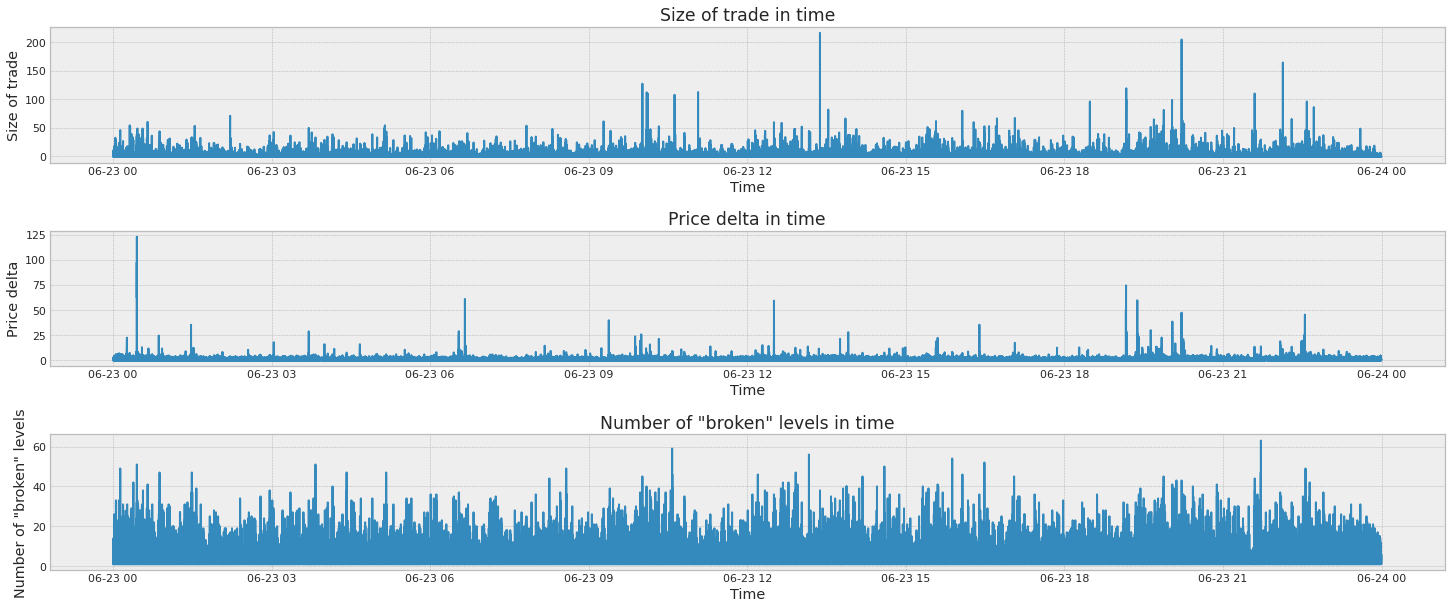

In [54]:
plt.subplots(figsize=(25,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.plot(ask_trade_size.index, ask_trade_size)
plt.xlabel('Time')
plt.ylabel('Size of trade')
plt.title('Size of trade in time')

plt.subplot(312)
plt.plot(ask_price_diff.index, ask_price_diff)
plt.xlabel('Time')
plt.ylabel('Price delta')
plt.title('Price delta in time')

plt.subplot(313)
plt.plot(ask_br_n_levels.index, ask_br_n_levels)
plt.xlabel('Time')
plt.ylabel('Number of "broken" levels')
plt.title('Number of "broken" levels in time')

Text(0.5, 1.0, 'Scatter plot for size of ask market trade and number of "broken" levels')

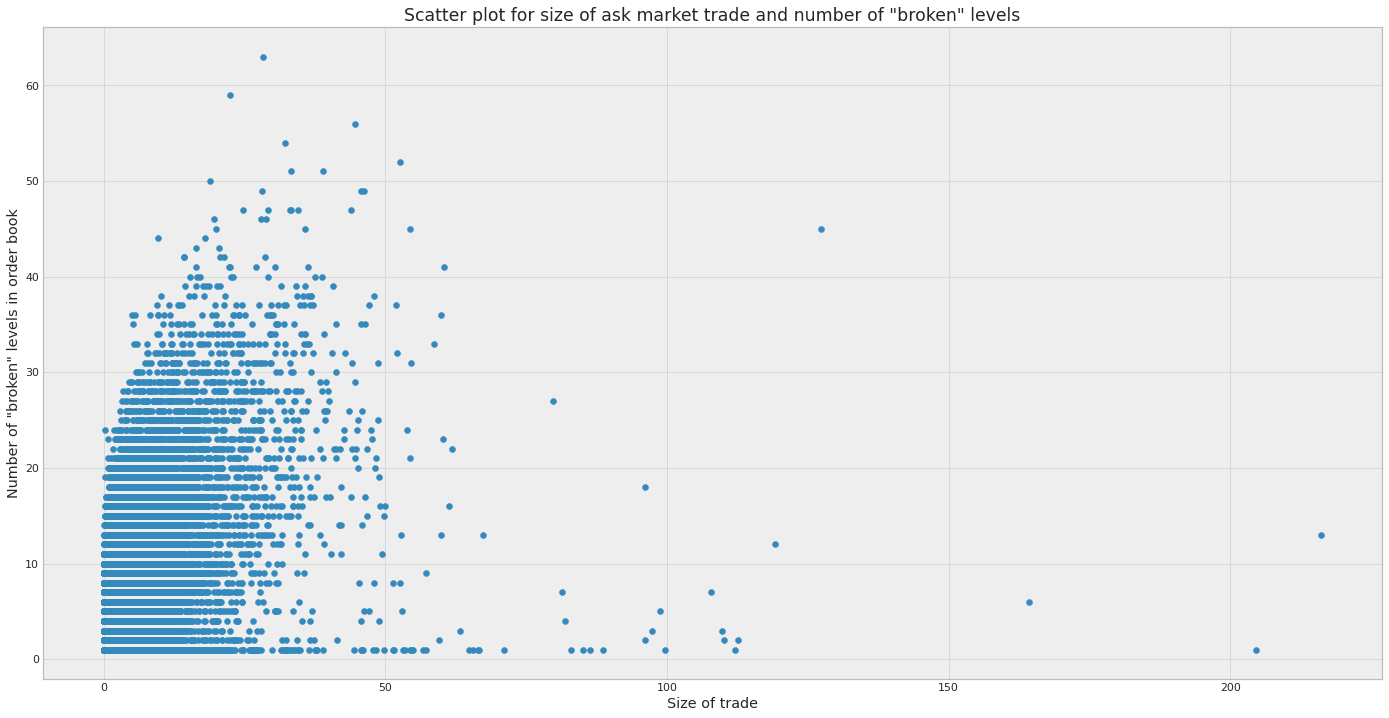

In [55]:
plt.figure(figsize=(24,12))
plt.scatter(x=ask_trade_size, y=ask_br_n_levels)
plt.xlabel('Size of trade')
plt.ylabel('Number of "broken" levels in order book')
plt.title('Scatter plot for size of ask market trade and number of "broken" levels')

Let's plot cumulative daily volume for additional information.

Text(0, 0.5, 'Cumulative volume of ask trades')

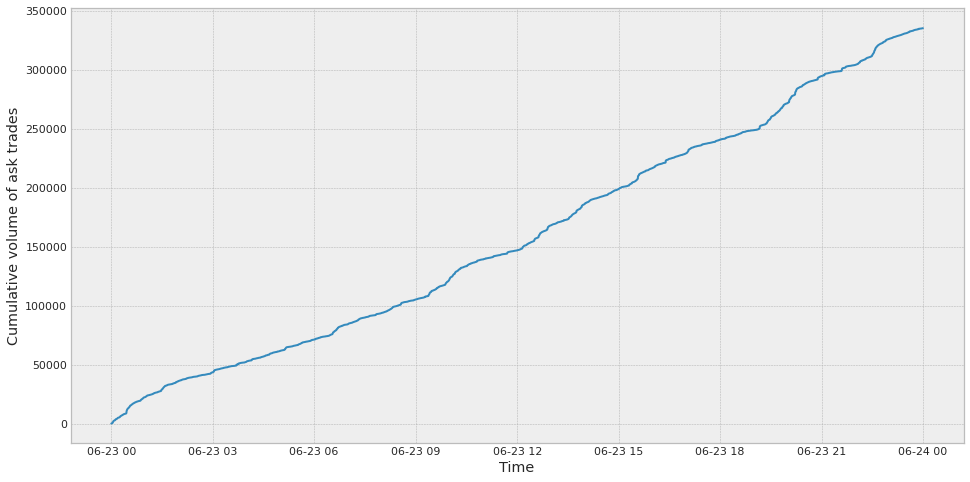

In [56]:
plt.plot(ask_trade_size.index, ask_trade_size.cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative volume of ask trades')

Let's look only at low volumes.

In [57]:
ask_trade_size_low = BTC_ask_trades_grouped.loc[ask_trade_size < 1].total_trade_size
ask_price_diff_low = BTC_ask_trades_grouped.loc[ask_trade_size < 1].price_diff
ask_br_n_levels_low = BTC_ask_trades_grouped.loc[ask_trade_size < 1].n_unique_levels

Text(0.5, 1.0, 'Scatter plot for size of ask market trade and best bid price delta (absolute difference between best price before trade and after)')

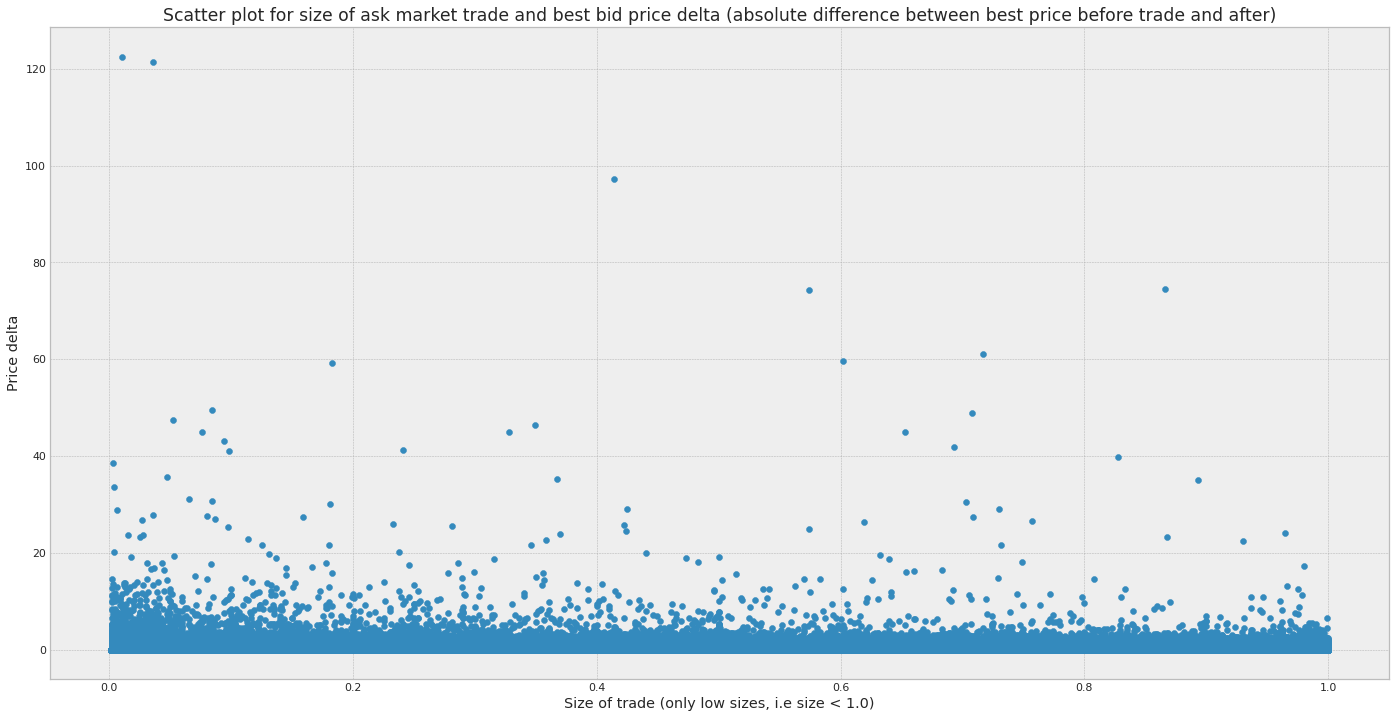

In [58]:
plt.figure(figsize=(24,12))
plt.scatter(x=ask_trade_size_low, y=ask_price_diff_low)
plt.xlabel('Size of trade (only low sizes, i.e size < 1.0)')
plt.ylabel('Price delta')
plt.title('Scatter plot for size of ask market trade and best bid price delta (absolute difference between best price before trade and after)')

Text(0.5, 1.0, 'Scatter plot for size of ask market trade and number of "broken" levels')

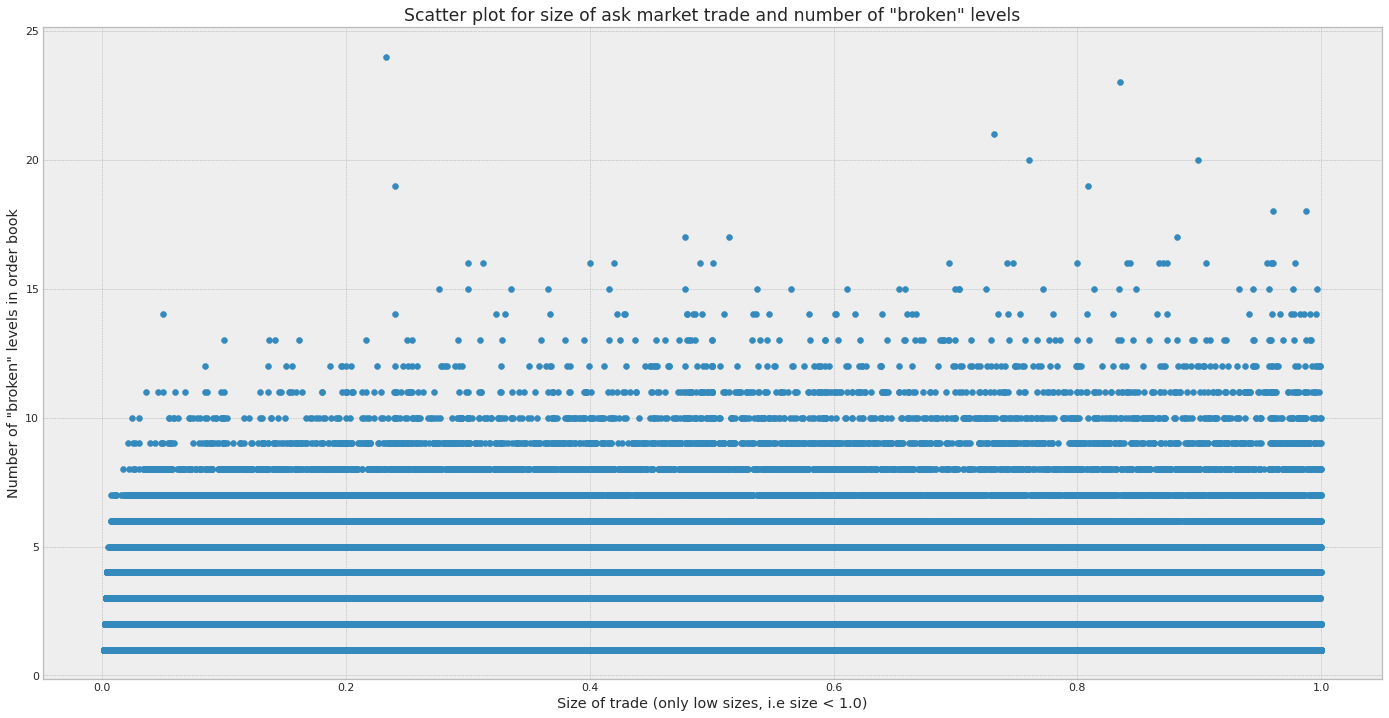

In [59]:
plt.figure(figsize=(24,12))
plt.scatter(x=ask_trade_size_low, y=ask_br_n_levels_low)
plt.xlabel('Size of trade (only low sizes, i.e size < 1.0)')
plt.ylabel('Number of "broken" levels in order book')
plt.title('Scatter plot for size of ask market trade and number of "broken" levels')

Text(0.5, 1.0, 'Number of "broken" levels in time')

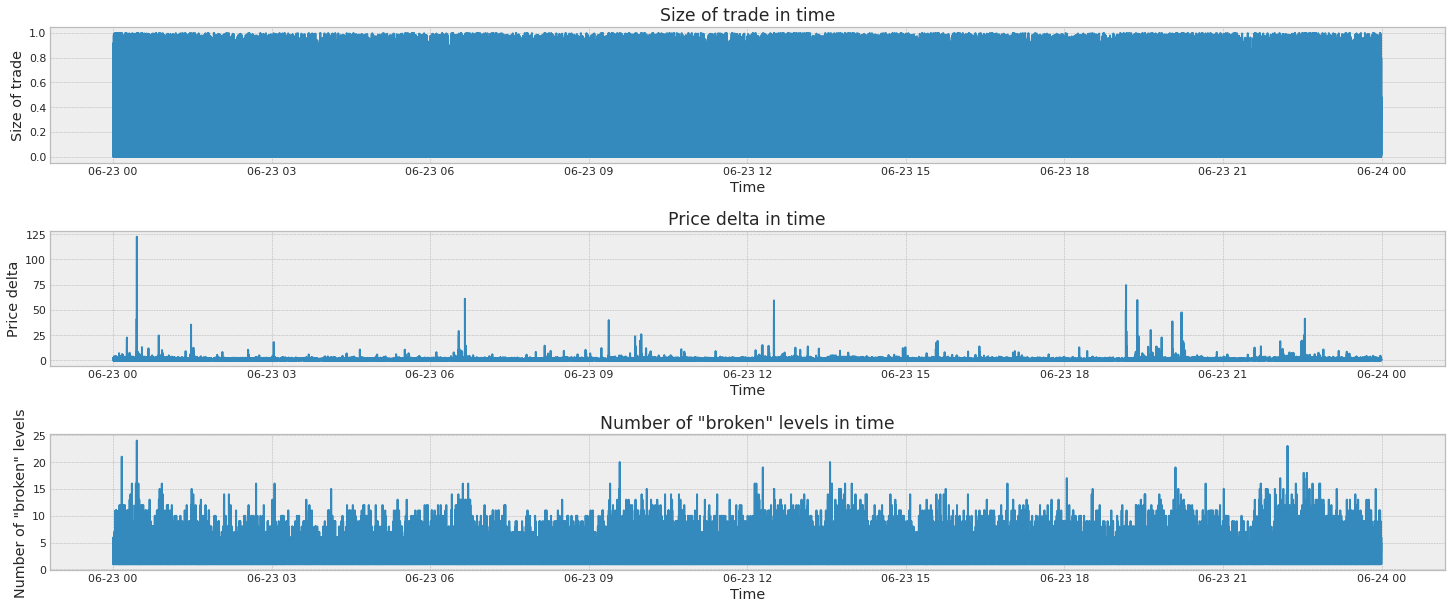

In [60]:
plt.subplots(figsize=(25,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.plot(ask_trade_size_low.index, ask_trade_size_low)
plt.xlabel('Time')
plt.ylabel('Size of trade')
plt.title('Size of trade in time')

plt.subplot(312)
plt.plot(ask_price_diff_low.index, ask_price_diff_low)
plt.xlabel('Time')
plt.ylabel('Price delta')
plt.title('Price delta in time')

plt.subplot(313)
plt.plot(ask_br_n_levels_low.index, ask_br_n_levels_low)
plt.xlabel('Time')
plt.ylabel('Number of "broken" levels')
plt.title('Number of "broken" levels in time')

### Bid side

Text(0.5, 1.0, 'Scatter plot for size of bid market trade and best ask price delta (absolute difference between best price before trade and after)')

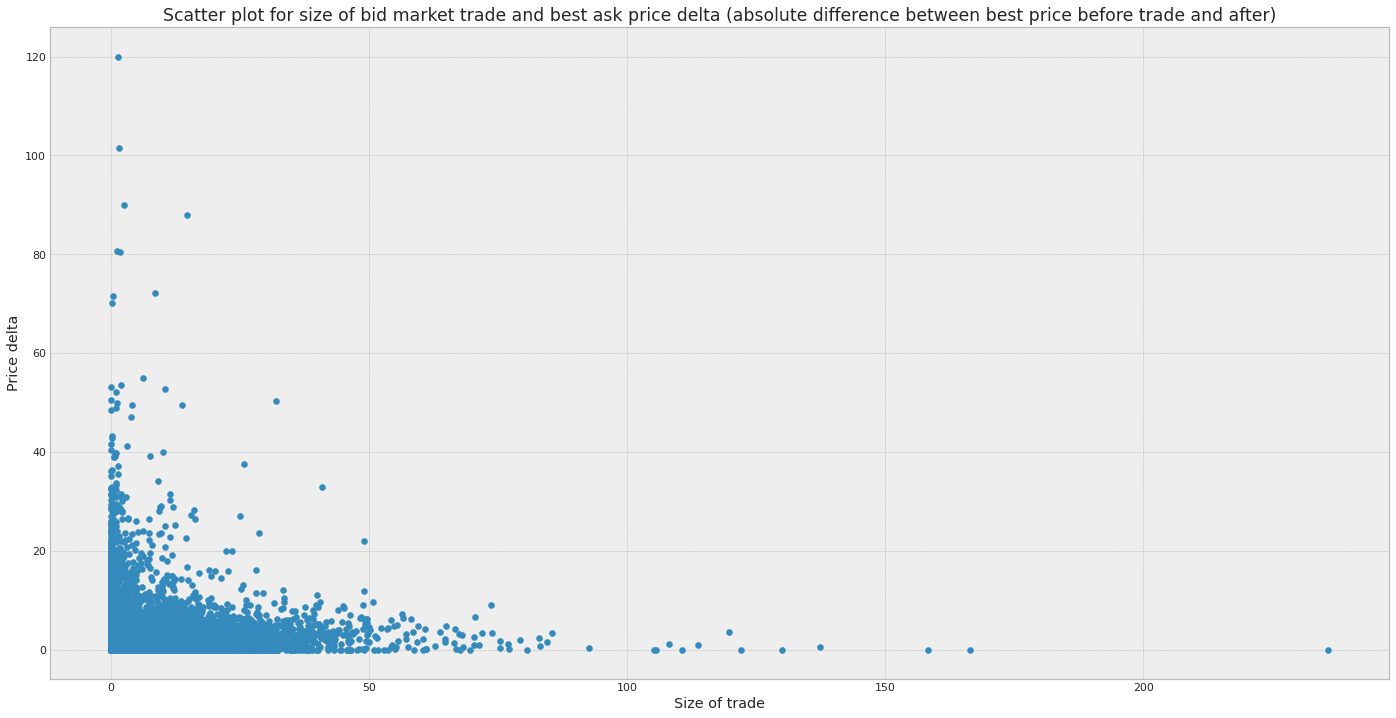

In [61]:
plt.figure(figsize=(24,12))
plt.scatter(x=bid_trade_size, y=bid_price_diff)
plt.xlabel('Size of trade')
plt.ylabel('Price delta')
plt.title('Scatter plot for size of bid market trade and best ask price delta (absolute difference between best price before trade and after)')

Text(0.5, 1.0, 'Scatter plot for size of bid market trade and number of "broken" levels')

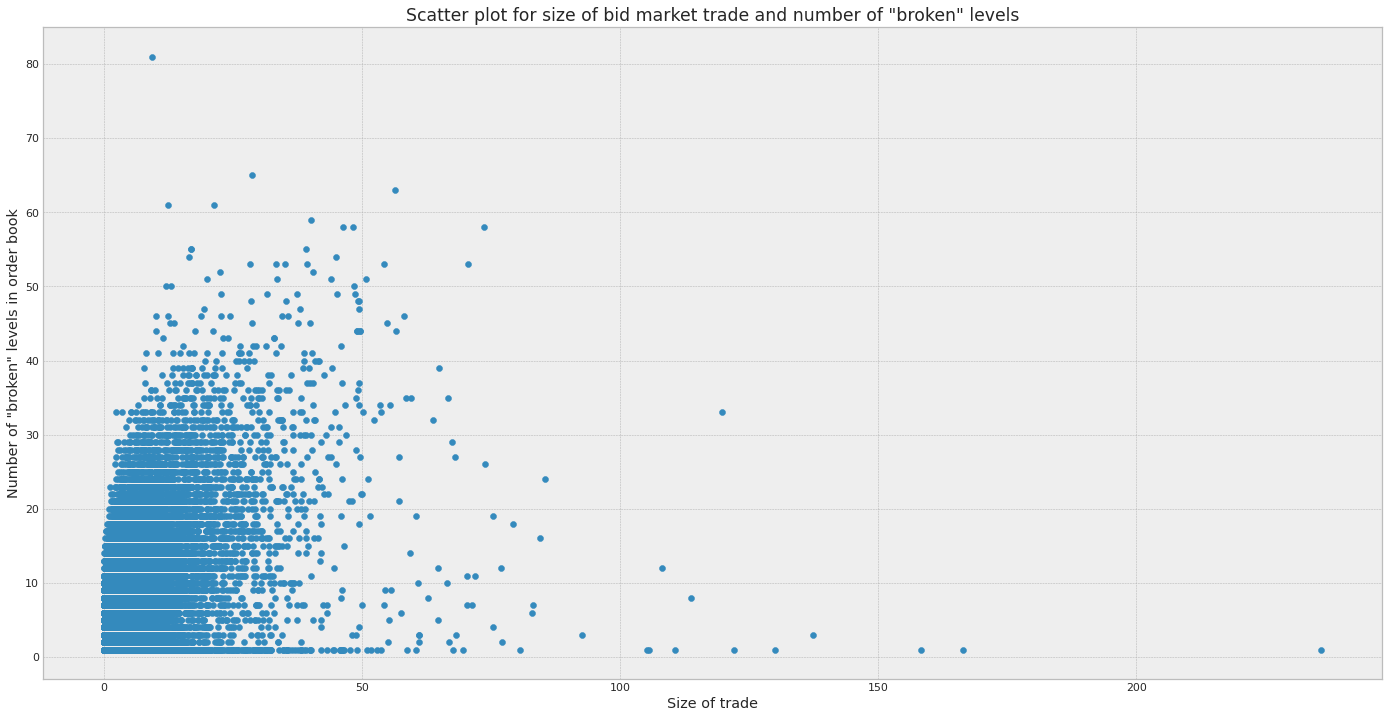

In [62]:
plt.figure(figsize=(24,12))
plt.scatter(x=bid_trade_size, y=bid_br_n_levels)
plt.xlabel('Size of trade')
plt.ylabel('Number of "broken" levels in order book')
plt.title('Scatter plot for size of bid market trade and number of "broken" levels')

Text(0.5, 1.0, 'Number of "broken" levels in time')

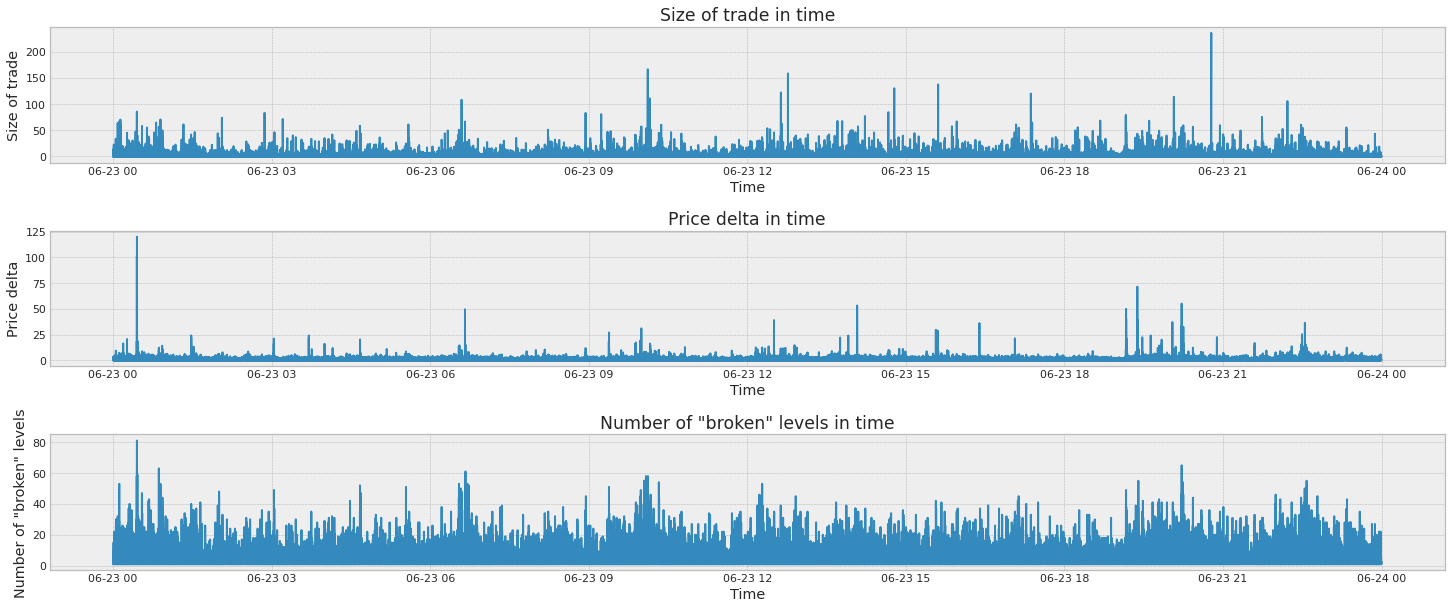

In [63]:
plt.subplots(figsize=(25,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.plot(bid_trade_size.index, bid_trade_size)
plt.xlabel('Time')
plt.ylabel('Size of trade')
plt.title('Size of trade in time')

plt.subplot(312)
plt.plot(bid_price_diff.index, bid_price_diff)
plt.xlabel('Time')
plt.ylabel('Price delta')
plt.title('Price delta in time')

plt.subplot(313)
plt.plot(bid_br_n_levels.index, bid_br_n_levels)
plt.xlabel('Time')
plt.ylabel('Number of "broken" levels')
plt.title('Number of "broken" levels in time')

Text(0, 0.5, 'Cumulative volume of bid trades')

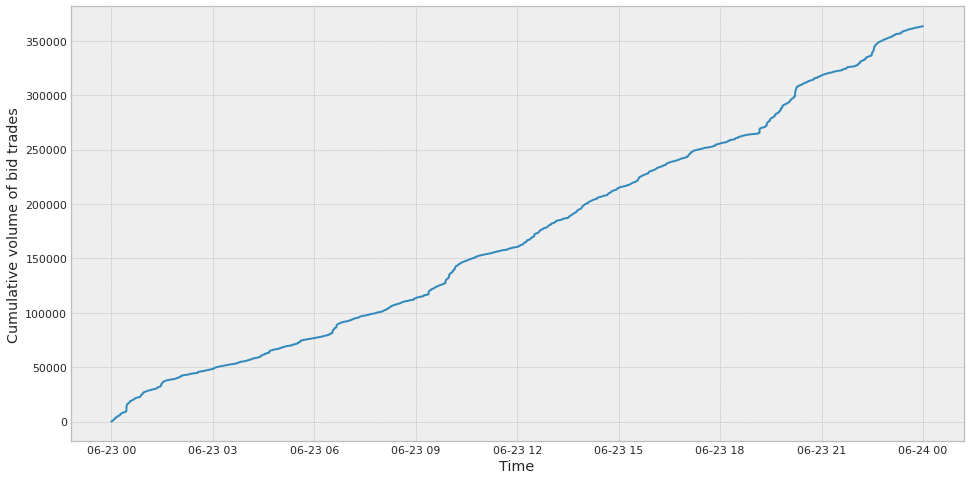

In [64]:
plt.plot(bid_trade_size.index, bid_trade_size.cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative volume of bid trades')

Let's look only at low volumes.

In [65]:
bid_trade_size_low = BTC_bid_trades_grouped.loc[bid_trade_size < 1].total_trade_size
bid_price_diff_low = BTC_bid_trades_grouped.loc[bid_trade_size < 1].price_diff
bid_br_n_levels_low = BTC_bid_trades_grouped.loc[bid_trade_size < 1].n_unique_levels

Text(0.5, 1.0, 'Number of "broken" levels in time')

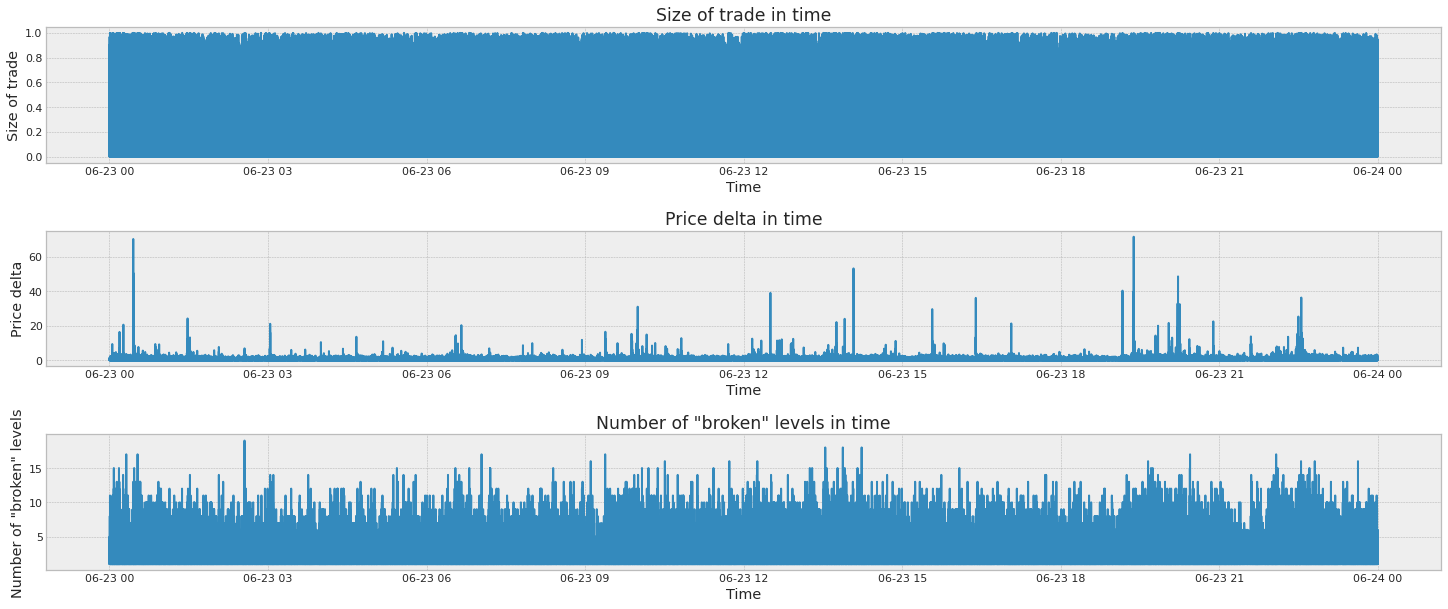

In [66]:
plt.subplots(figsize=(25,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.plot(bid_trade_size_low.index, bid_trade_size_low)
plt.xlabel('Time')
plt.ylabel('Size of trade')
plt.title('Size of trade in time')

plt.subplot(312)
plt.plot(bid_price_diff_low.index, bid_price_diff_low)
plt.xlabel('Time')
plt.ylabel('Price delta')
plt.title('Price delta in time')

plt.subplot(313)
plt.plot(bid_br_n_levels_low.index, bid_br_n_levels_low)
plt.xlabel('Time')
plt.ylabel('Number of "broken" levels')
plt.title('Number of "broken" levels in time')